# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [ ]:
hm = pd.read_csv("hmeq.csv")

In [ ]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [ ]:
# Display first five rows
print(data.head())

   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  


In [ ]:
# Display last 5 rows
print(data.tail())

      BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  


### **Understand the shape of the dataset**

In [ ]:
# Check the shape of the data
print("Shape of the dataset:", data.shape)

Shape of the dataset: (5960, 13)


**Insights ________**
First 5 Rows

The first few rows give a snapshot of the dataset and show:
Features like BAD, LOAN, MORTDUE, VALUE, REASON, etc., are present.
Missing Values: Columns like MORTDUE, VALUE, REASON, JOB, YOJ, and DEBTINC have missing values in some rows (e.g., row 3).
Some features like CLAGE, NINQ, and DEBTINC contain NaN values.

Last 5 Rows

The last few rows:
Show similar patterns of missing data in columns like DEBTINC.
Confirm the dataset's integrity by presenting valid feature values (e.g., LOAN, CLAGE).
Some features like REASON and JOB appear to have consistent categorical values (HomeImp, DebtCon, Other).

Missing Data:

Many features have missing values (e.g., MORTDUE, YOJ, DEBTINC), which will require imputation or handling.

Categorical Columns: Columns like REASON and JOB are categorical and need encoding before modeling.

Class Imbalance in BAD: Observing from a larger dataset analysis, the BAD variable may be imbalanced (needs to be verified with further analysis).

### **Check the data types of the columns**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights ______________**

### **Check for missing values**

In [ ]:
# Analyse missing values - Hint: use isnull() function
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [ ]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Calculate the percentage of missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display the percentage of missing values for each column
print("Percentage of missing values in each column:\n", missing_percentage)

Percentage of missing values in each column:
 BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


**Insights ________**

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?

Why Percentage of Missing Values is Better?
Scalability Across Datasets:

Total missing values can vary significantly with dataset size. For example, 100 missing values in a small dataset of 500 rows is far more significant (20%) than in a dataset of 10,000 rows (1%).

The percentage gives a consistent measure of the proportion of missing data, making it easier to compare across features or datasets.
Impact Assessment:

The percentage helps assess how much of the column's data is missing relative to its importance for the analysis.

- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them?

What Limit to Consider for Missing Values?
The threshold for acceptable missing values depends on the context, but common guidelines include:

Low Threshold (<5% Missing):

Columns with less than 5% missing values can usually be safely imputed without losing much information.
For example: VALUE (~1.9% missing) and REASON (~4.2% missing) in the dataset can be imputed.
Moderate Threshold (5% to 20% Missing):

Imputation becomes more complex as missing values increase. You need to evaluate whether the column is critical for analysis. Examples: MORTDUE (~8.7%) and DELINQ (~9.7%).
Retain these columns only if they are important predictors, and ensure you use domain knowledge for imputation.
High Threshold (>20% Missing):

Columns with over 20% missing values are typically candidates for removal unless they are critical. Example: DEBTINC (~21.3% missing).
Retaining these columns might introduce bias or reduce model reliability due to excessive imputation.
Challenges with Handling Missing Data
Filling Missing Values (Imputation):
Bias in Predictions:

Imputing missing values (e.g., with the mean/median) can introduce bias, especially if the missing data is not random.
Example: If DEBTINC is missing more for defaulters, imputing its mean might dilute its predictive power.
Loss of Variance:

Imputation techniques like mean or mode can reduce the variability in the dataset.
Complexity:

Advanced imputation methods (e.g., k-NN, iterative imputation) are resource-intensive and require careful tuning.
Avoiding Missing Data (Dropping Columns):
Loss of Information:

Dropping columns with high missing values can lead to losing potentially valuable predictors.
Example: If DEBTINC is highly correlated with BAD, dropping it might weaken the model's ability to predict defaults.
Dimensionality Reduction:

While dropping features reduces dimensionality (good for simpler models), it risks losing interpretability or predictive power.
Recommended Approach for Your Dataset
Low Missing Columns (<10%):

Impute MORTDUE, VALUE, REASON, JOB, YOJ, DELINQ, and CLAGE using:
Median for numerical features (e.g., MORTDUE, CLAGE).
Mode or "Unknown" for categorical features (e.g., REASON, JOB).
Moderate Missing Columns (10-20%):

Assess DEROG (~11.8% missing):
If it’s strongly correlated with BAD, keep and impute it.
Otherwise, consider dropping it.
High Missing Columns (>20%):

Carefully evaluate DEBTINC (~21.3% missing):
If it’s critical to your analysis (e.g., high correlation with BAD), try advanced imputation.
Otherwise, consider dropping it.
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation of all numerical columns with the target variable `BAD`
correlation_with_target = data[numerical_columns].corr()['BAD'].sort_values(ascending=False)

# Display the correlation
print("Correlation of numerical features with BAD:\n", correlation_with_target)



**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [ ]:
cols = data.select_dtypes (['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append ('BAD')

In [ ]:
cols

['REASON', 'JOB', 'BAD']

In [ ]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

# Checking the info of the dataset
print("Updated info of the dataset:")
data.info()

# Checking the datatypes of all columns
print("\nData types of all variables:")
print(data.dtypes)

Updated info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB

Data types of all variables:
BAD        category
LOAN          int64
MORTDUE     float64
VALUE       float64
REASON     category
JOB        category
YOJ         float64
DEROG       float64
DELINQ      float64
CLAG

### **Analyze Summary Statistics of the dataset**

In [1]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

print("Summary statistics for numerical variables:")
print(data.describe())

Summary statistics for numerical variables:


NameError: name 'data' is not defined

**Insights ______________**

In [ ]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']

data.describe(include=['category']).T

**Insights _____________**

**Let's look at the unique values in all the categorical variables**

In [ ]:
# Checking the count of unique values in each categorical column

cols_cat = data.select_dtypes(['category'])

# Loop through each categorical column to print unique values
for i in cols_cat.columns:
    print('Unique values in', i, 'are:')
    print(data[i].value_counts())
    print('*' * 40)

**Insights _____________**

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure?

Absolute counts are useful to understand the frequency of categories, but they don't provide context about their relative proportions. If the dataset is large or imbalanced, absolute values might be misleading.

Better Measure: Relative Frequency (Percentages)
Instead of absolute counts, percentages can be calculated to understand the proportion of each category relative to the total.

- If not, what else can be used? Try implementing that.

Why Use Percentages?
Handles Imbalance Better:

Percentages show the relative importance of each category, irrespective of dataset size.
Comparison Across Columns:

Percentages enable easy comparison of category distributions across different columns or datasets.

In [ ]:
# Display the relative frequency (percentage) of unique values in each categorical column
cols_cat = data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Relative frequency of unique values in', i, 'are:')
    print((data[i].value_counts(normalize=True) * 100).round(2))  # Calculate percentages and round off to 2 decimal places
    print('*' * 40)

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

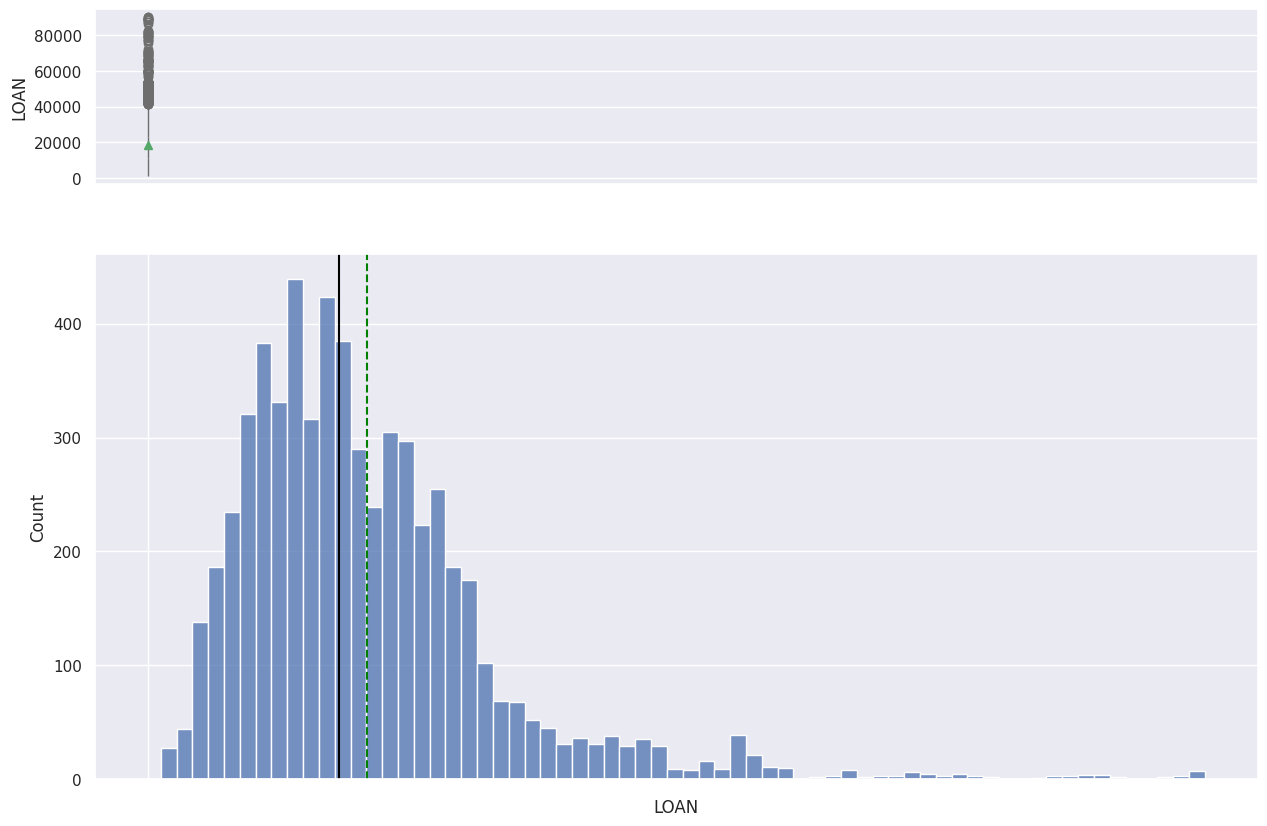

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

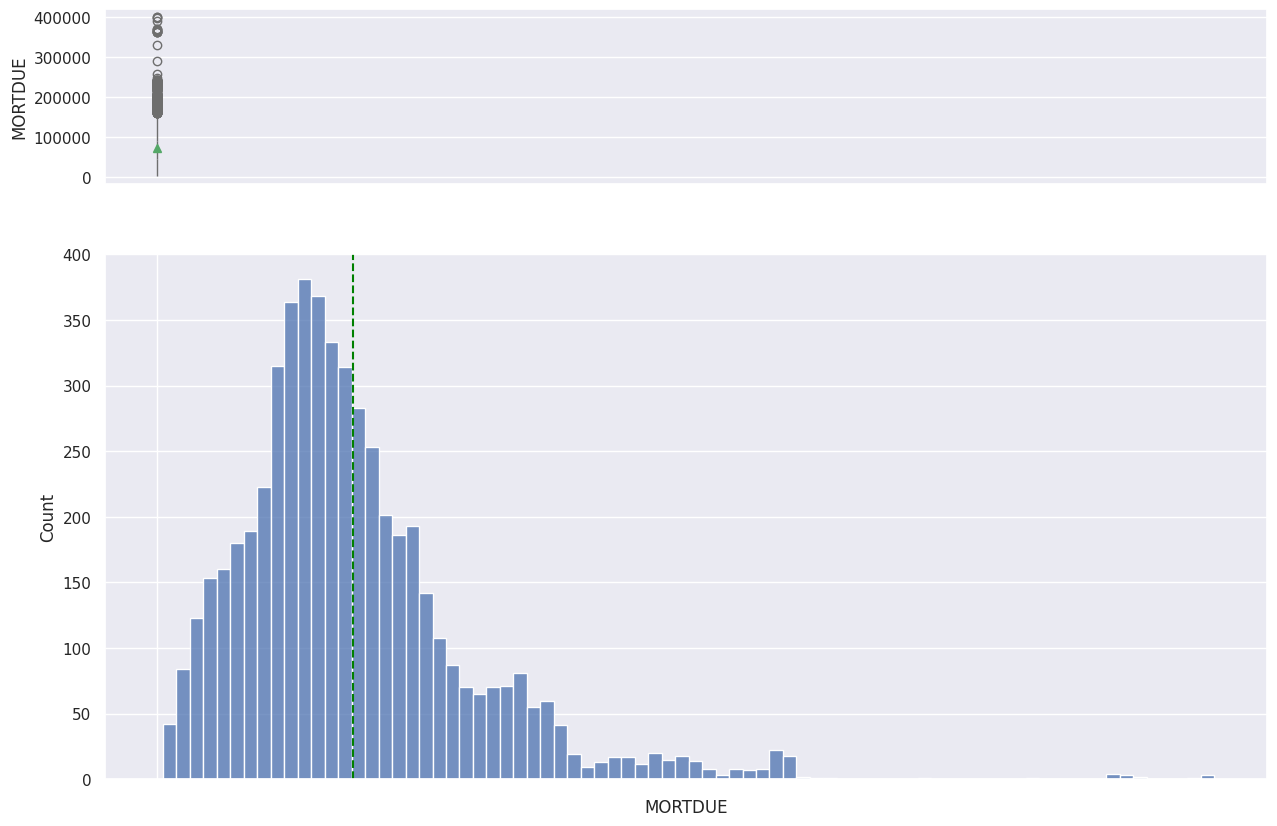

In [ ]:
# Build the histogram and boxplot for MORTDUE
histogram_boxplot(data['MORTDUE'])

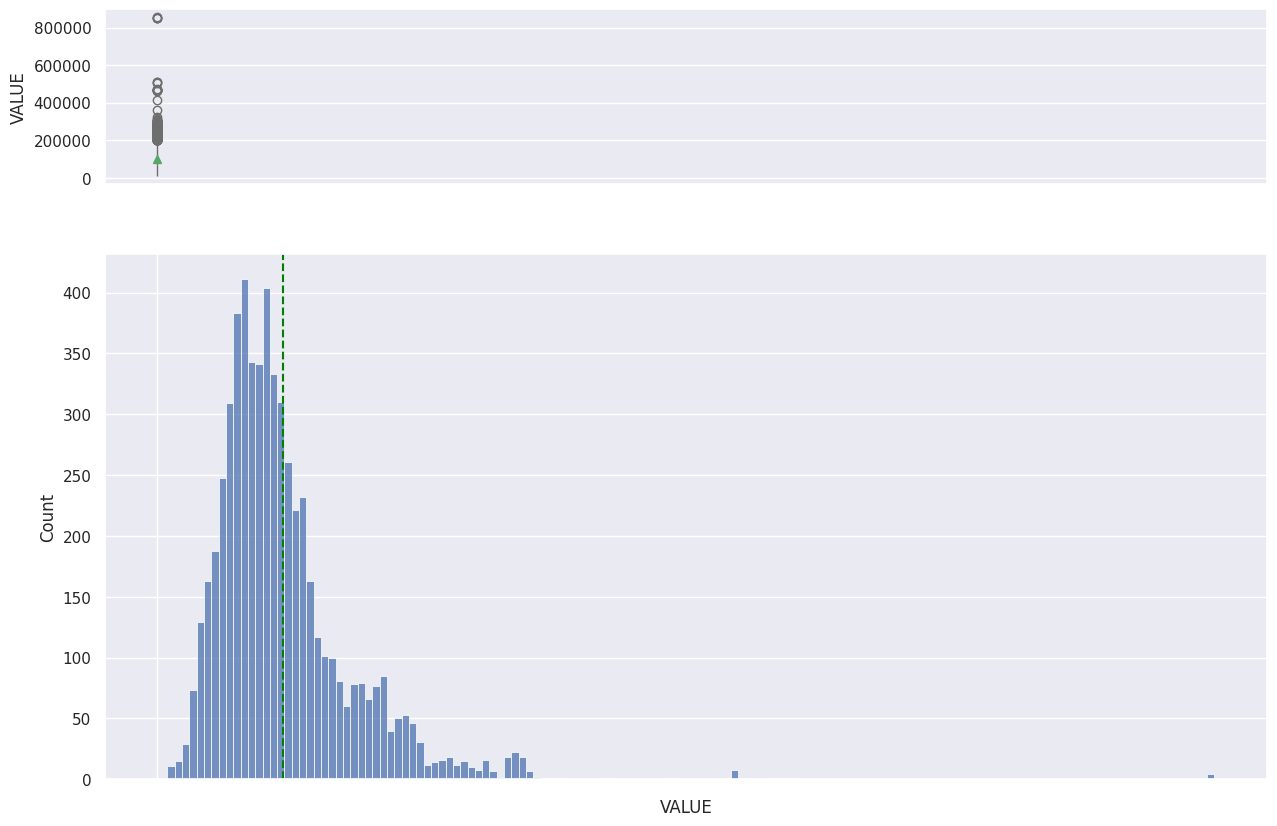

In [ ]:
# Build the histogram and boxplot for VALUE
histogram_boxplot(data['VALUE'])

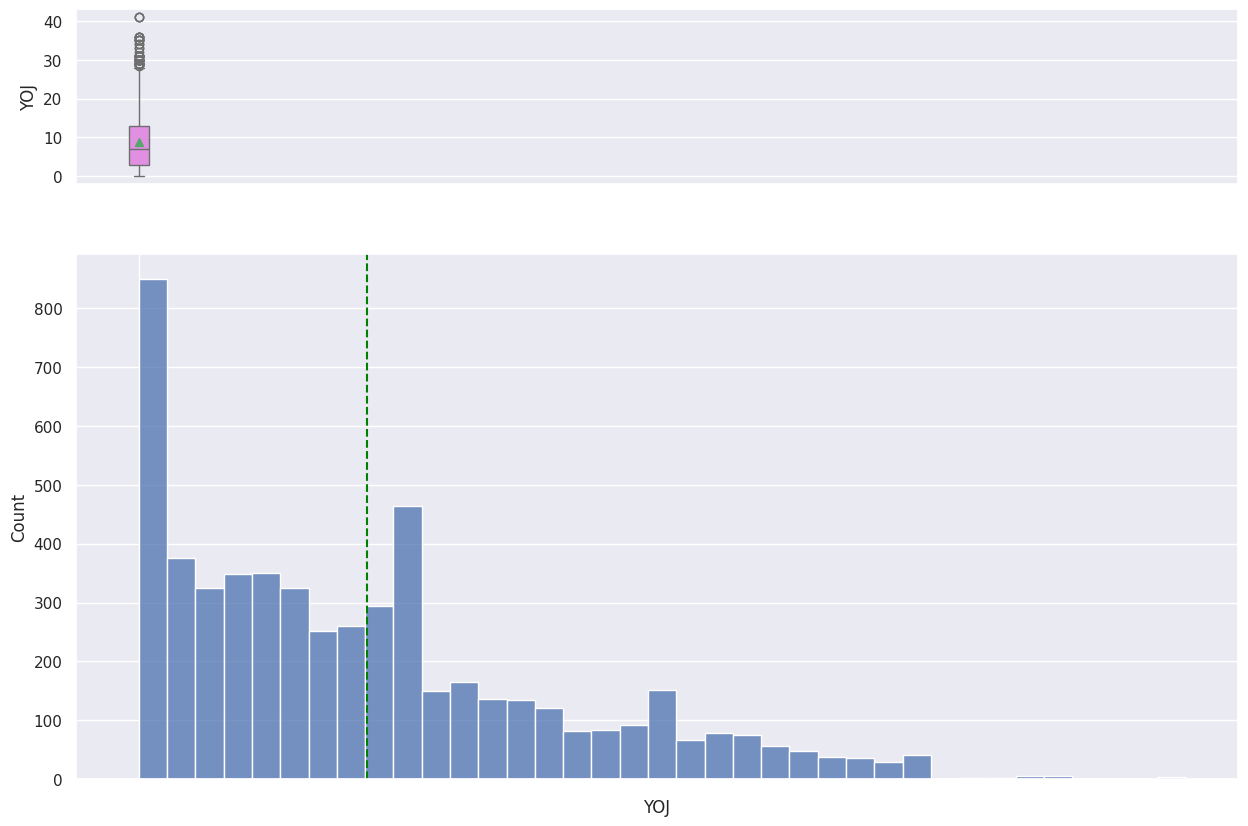

In [ ]:
# Build the histogram and boxplot for YOJ
histogram_boxplot(data['YOJ'])

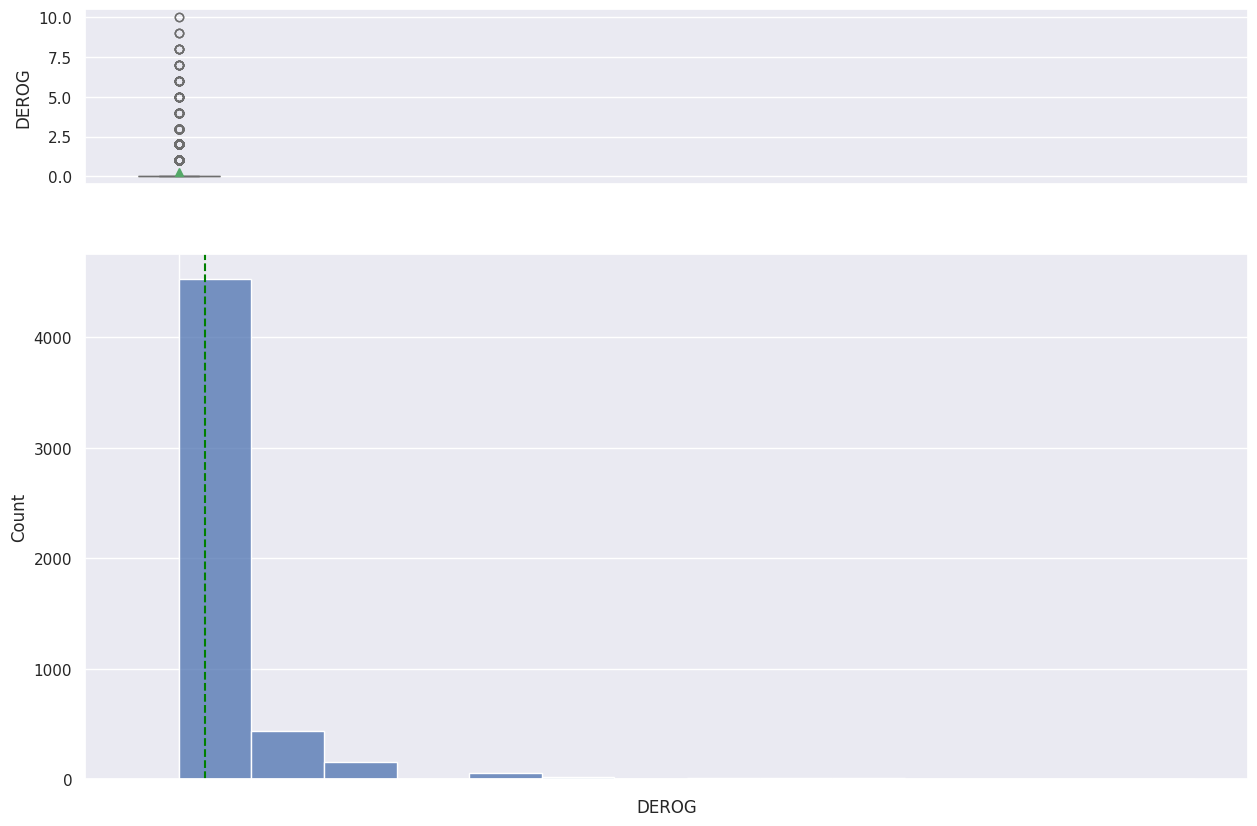

In [ ]:
# Build the histogram and boxplot for DEROG
histogram_boxplot(data['DEROG'])

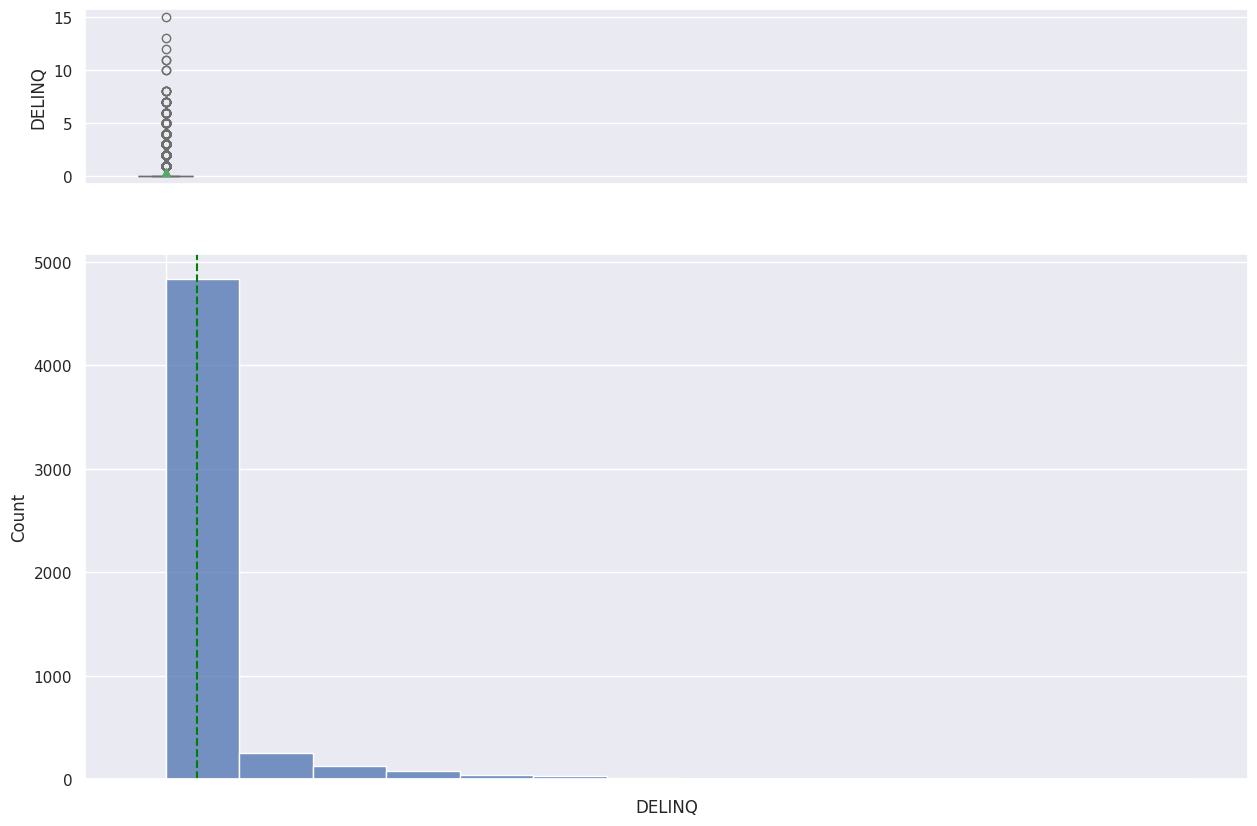

In [ ]:
# Build the histogram and boxplot for DELINQ
histogram_boxplot(data['DELINQ'])

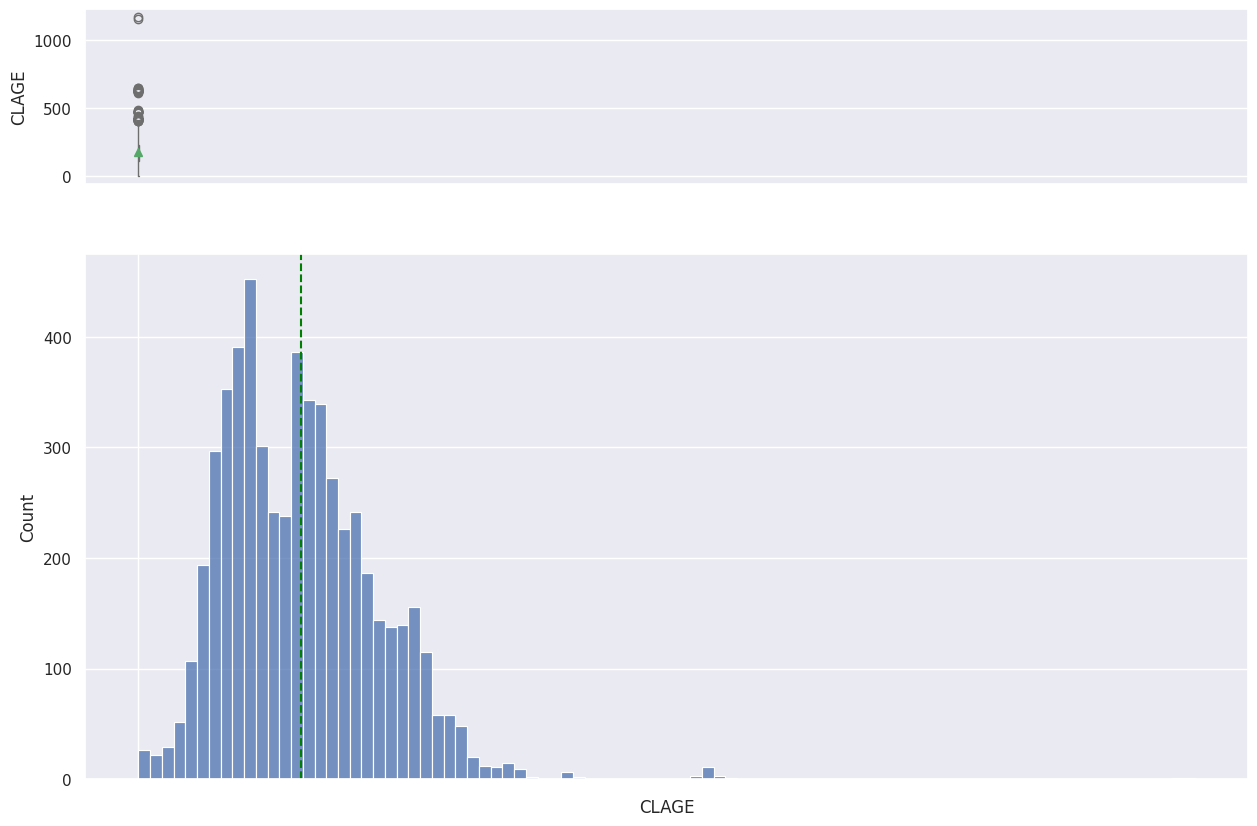

In [ ]:
# Build the histogram and boxplot for CLAGE
histogram_boxplot(data['CLAGE'])

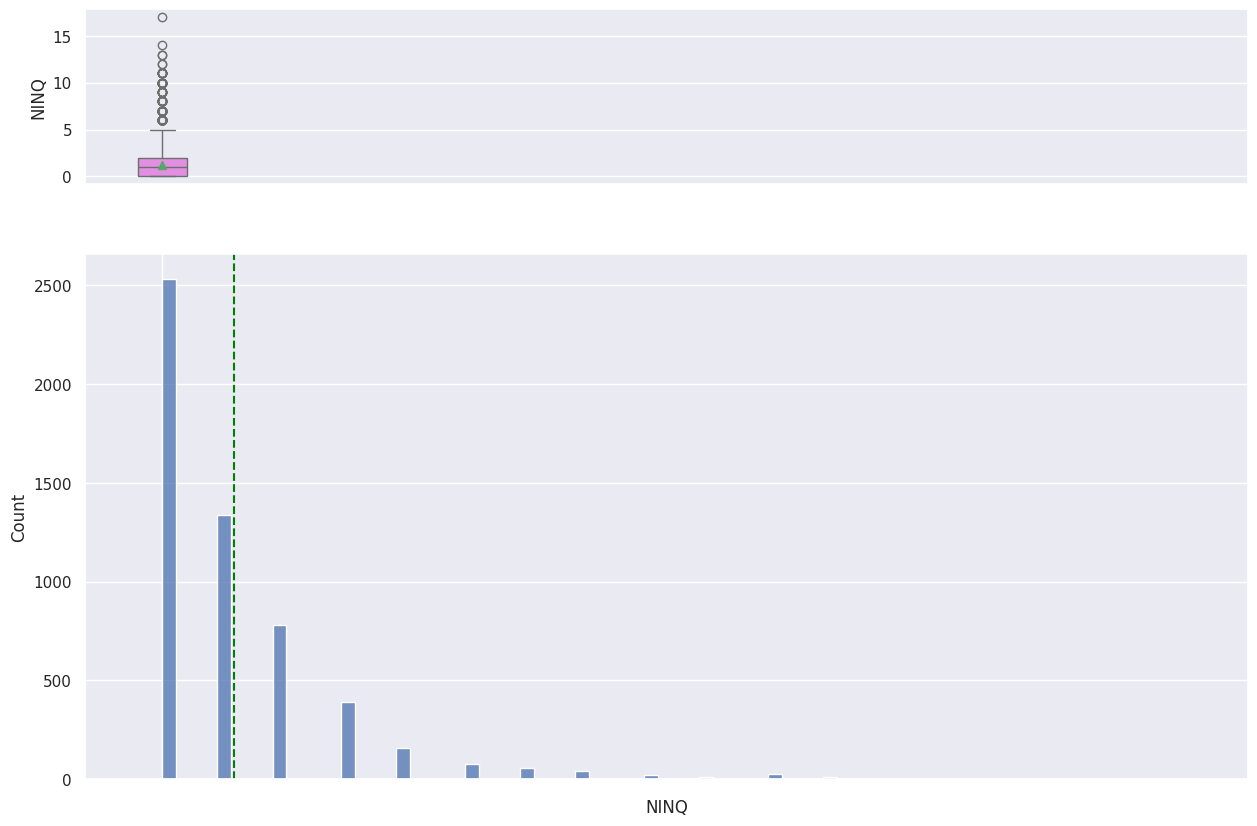

In [ ]:
# Build the histogram and boxplot for NINQ
histogram_boxplot(data['NINQ'])

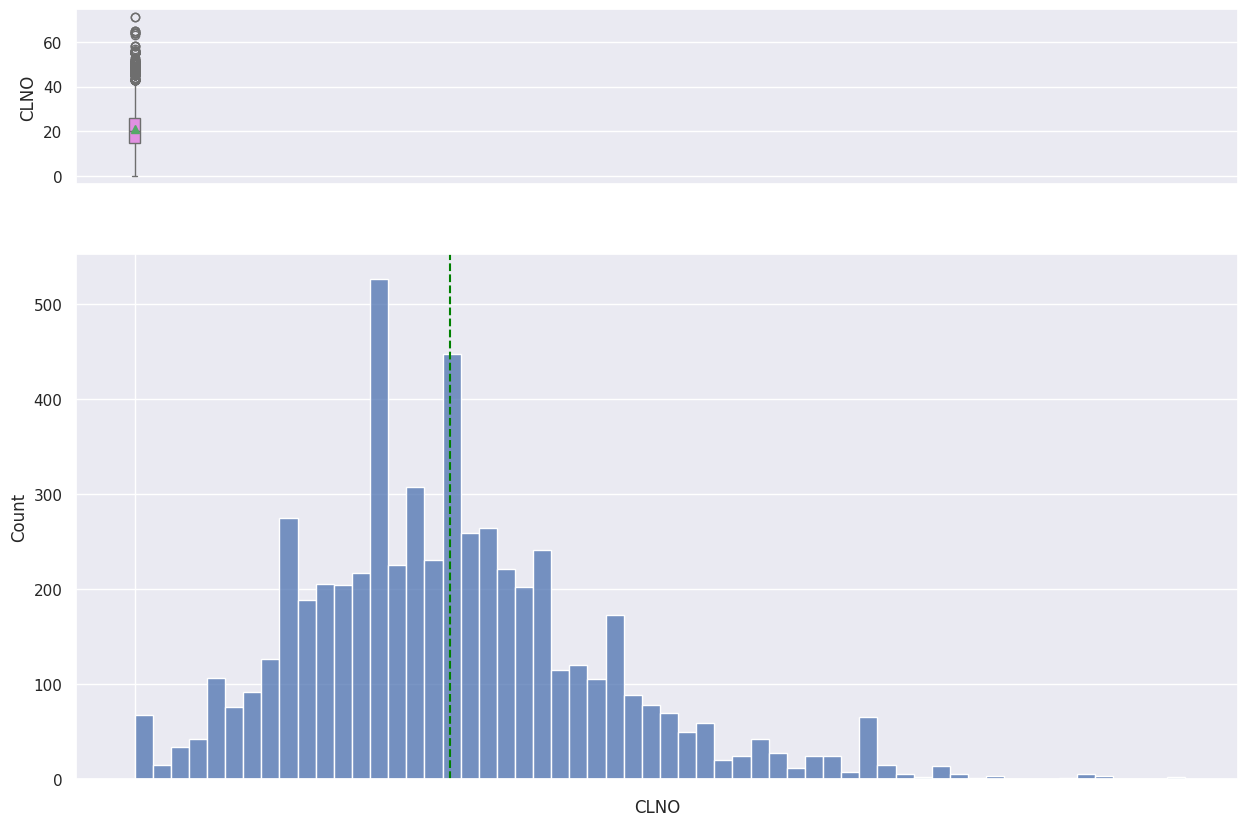

In [ ]:
# Build the histogram and boxplot for CLNO
histogram_boxplot(data['CLNO'])

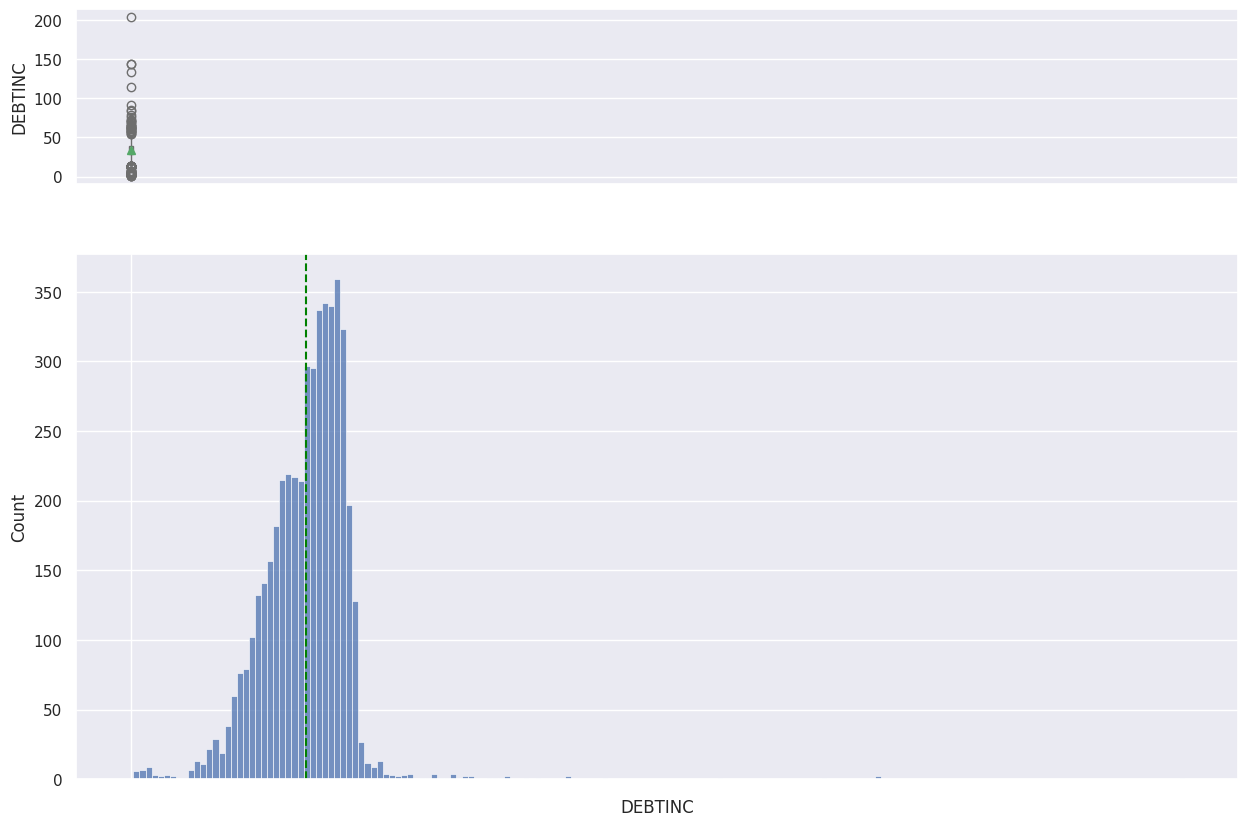

In [ ]:
# Build the histogram and boxplot for DEBTINC
histogram_boxplot(data['DEBTINC'])

**Insights __________**

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

**Insights ____________**

### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

#### Analyze Barplot for DELINQ

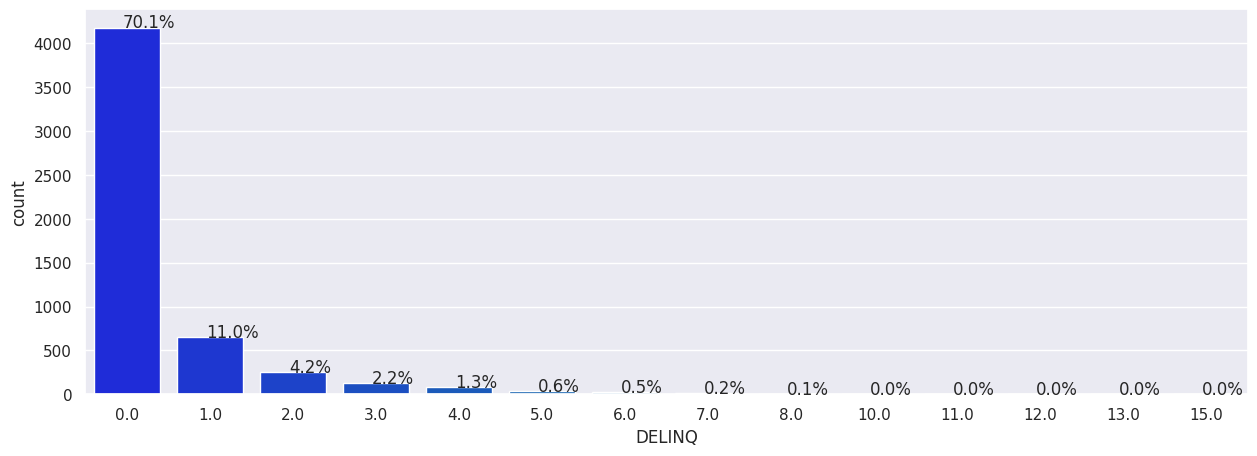

In [ ]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

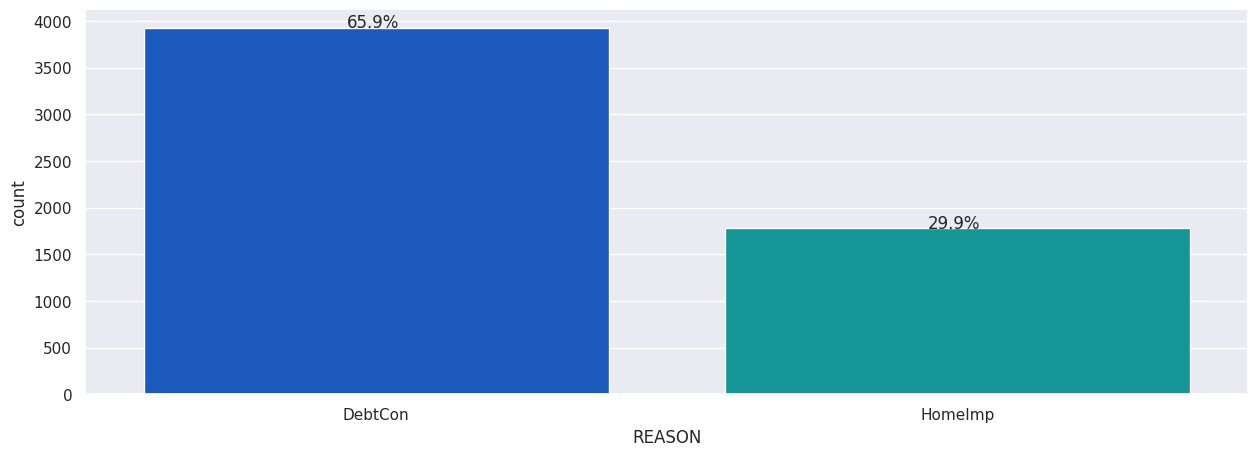

In [ ]:
# Barplot for REASON
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=data["REASON"], palette='winter')
perc_on_bar(ax, data["REASON"])

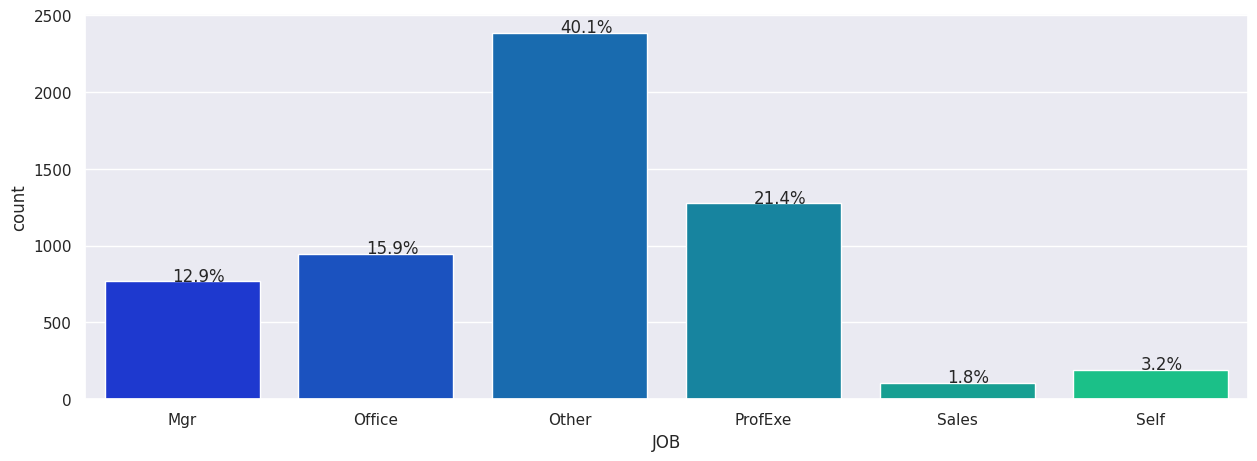

In [ ]:
# Barplot for JOB
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=data["JOB"], palette='winter')
perc_on_bar(ax, data["JOB"])

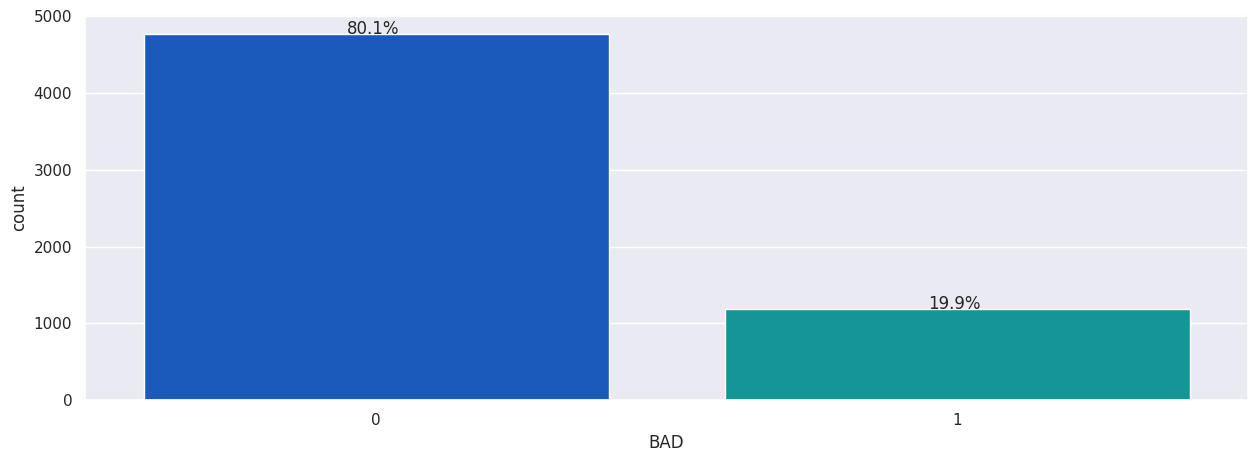

In [ ]:
# Barplot for BAD
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=data["BAD"], palette='winter')
perc_on_bar(ax, data["BAD"])

Numerical variables Barplot


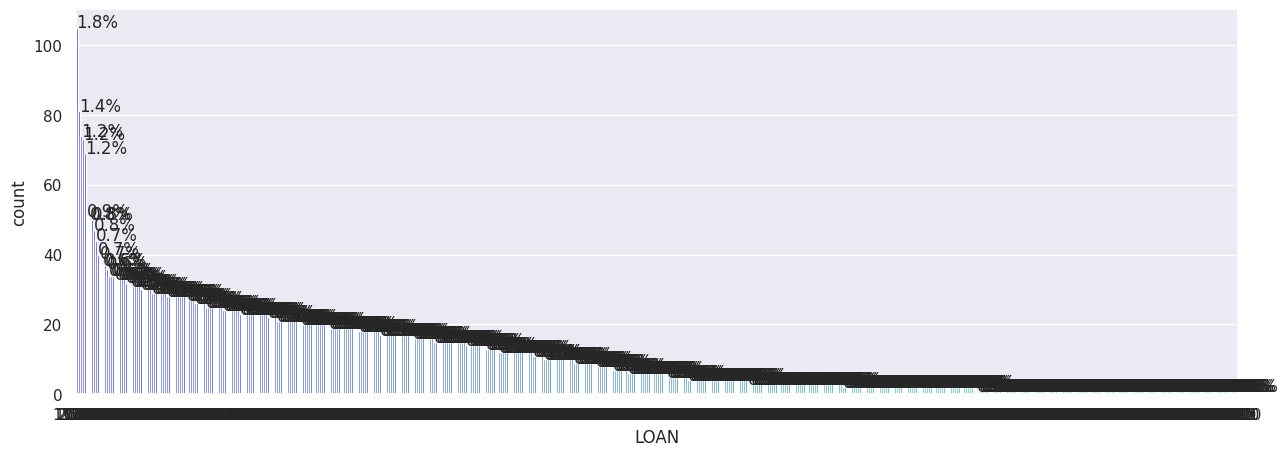

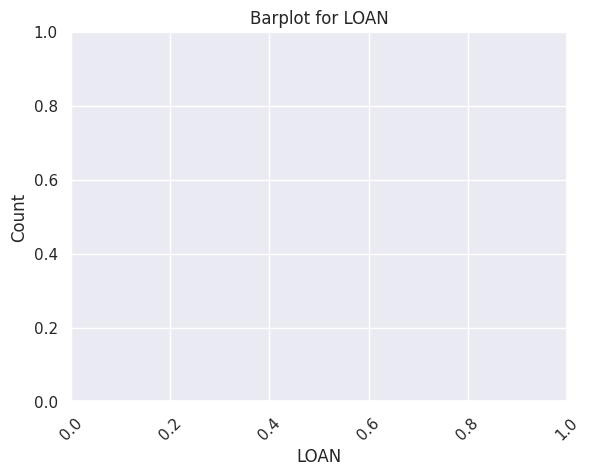

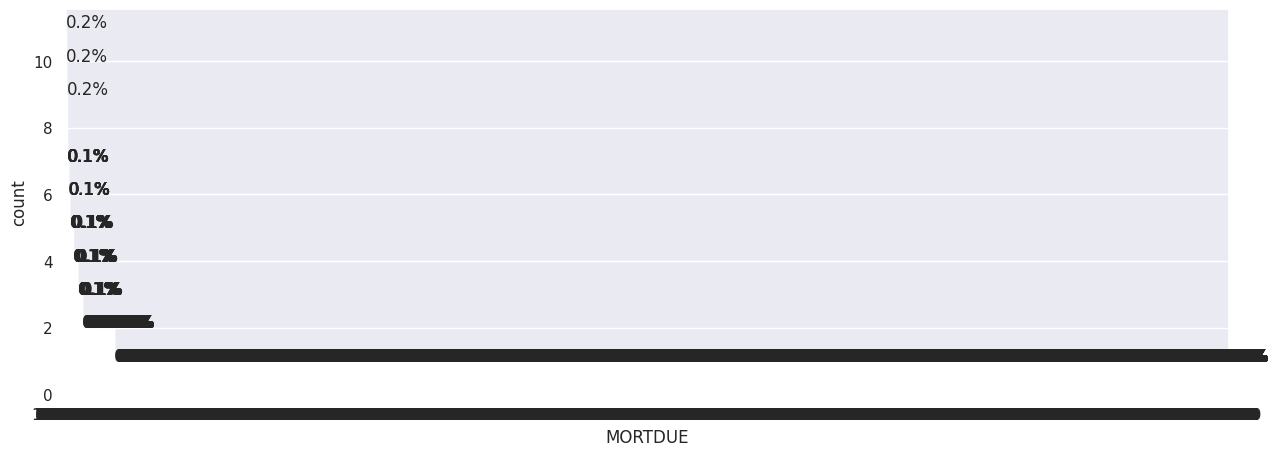

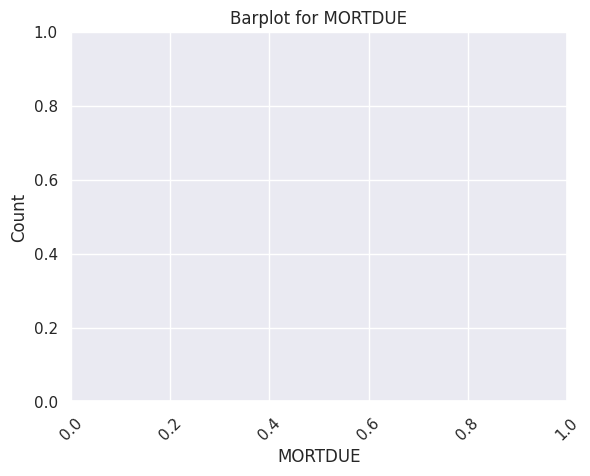

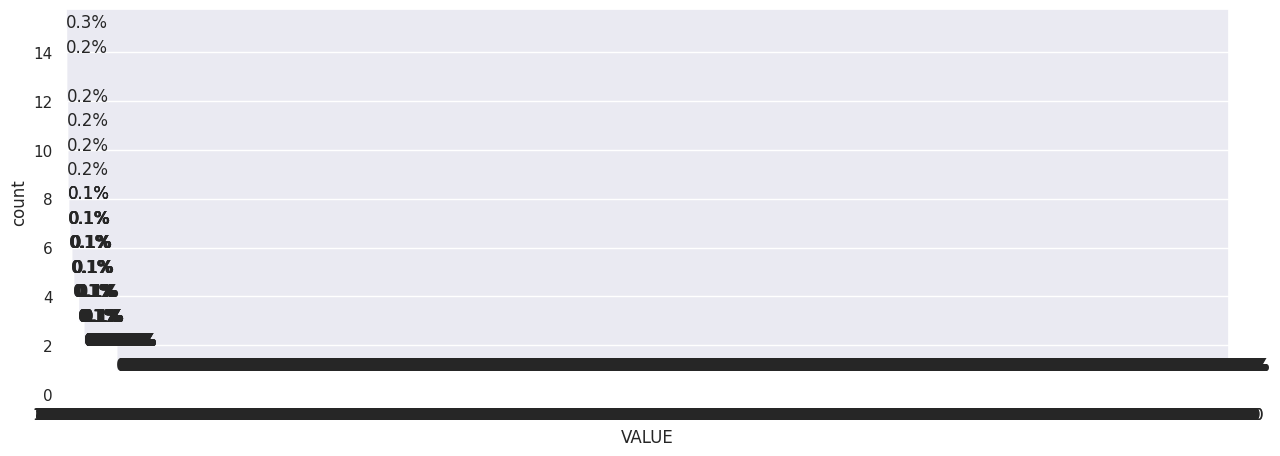

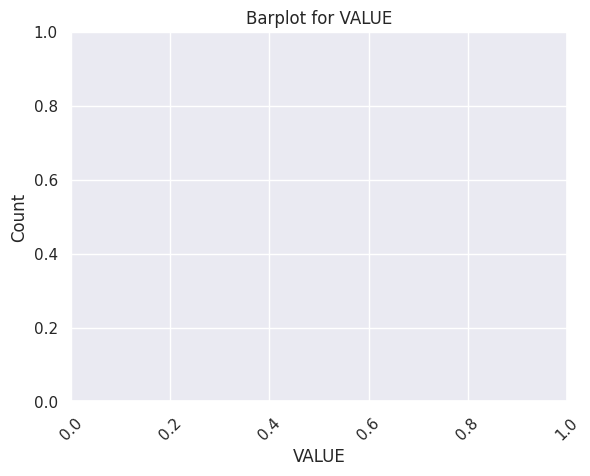

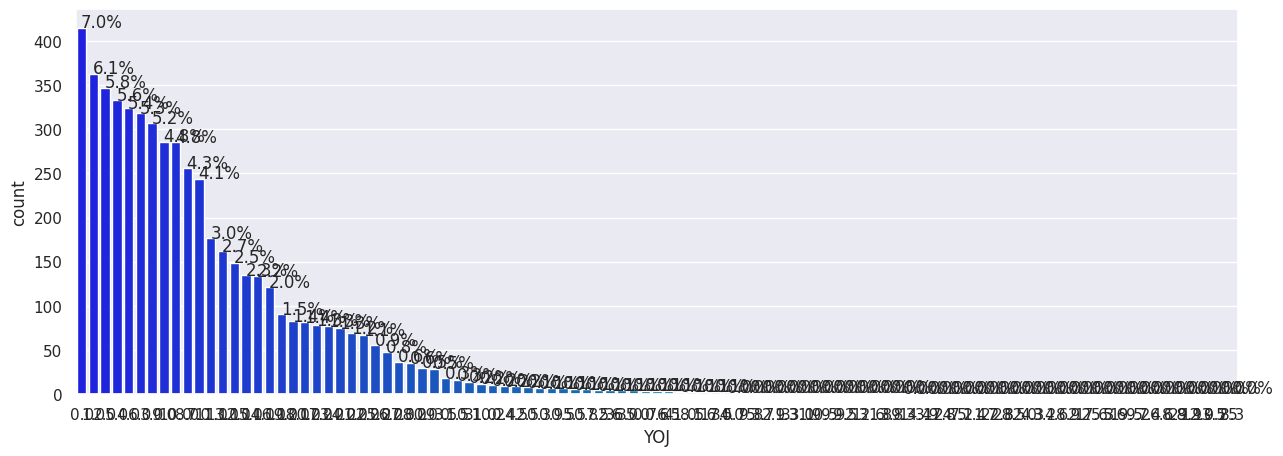

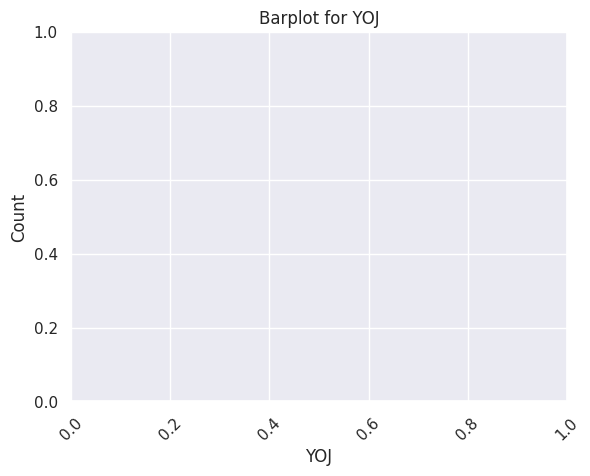

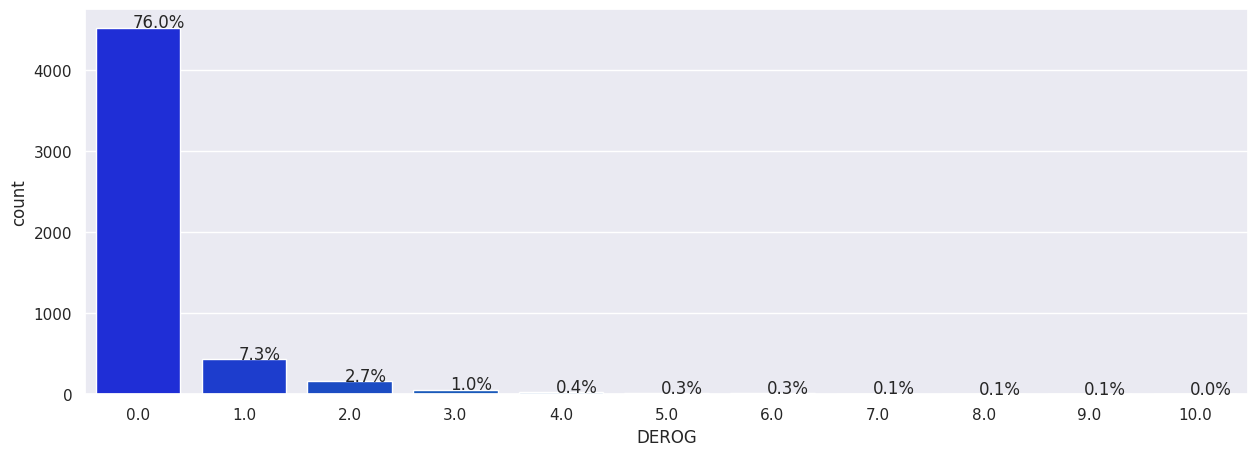

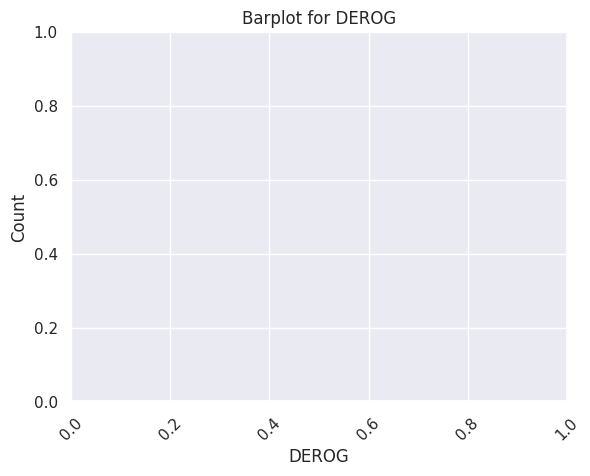

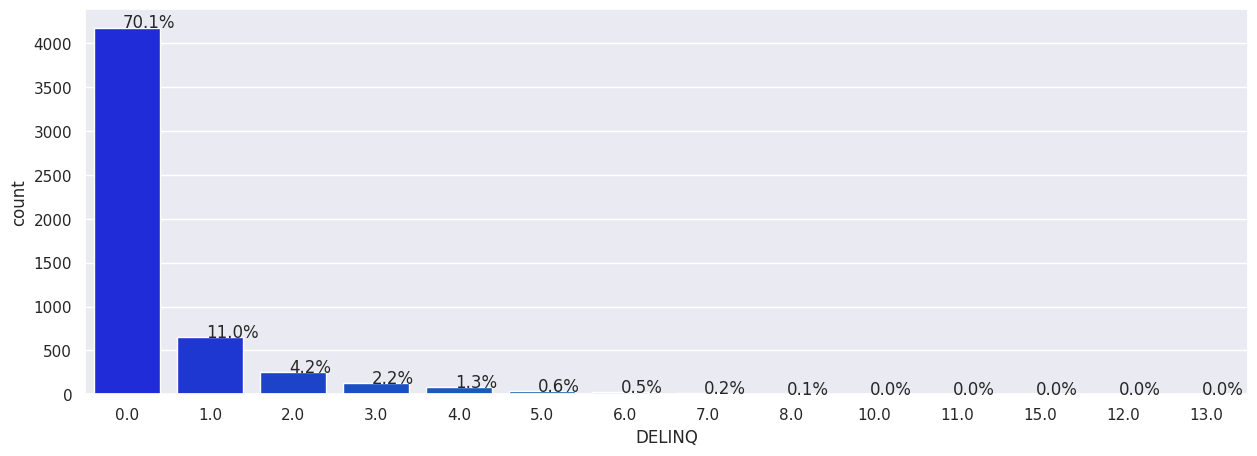

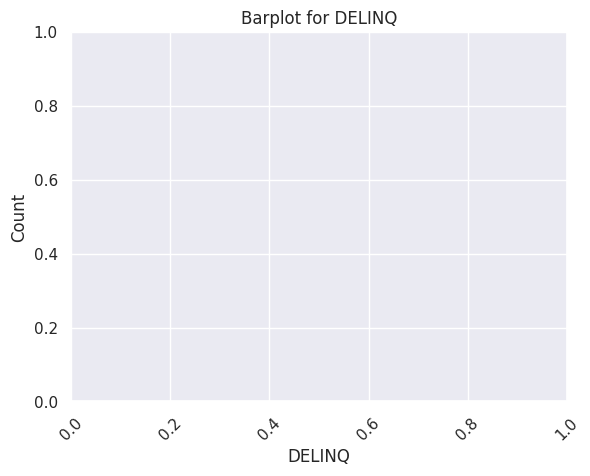

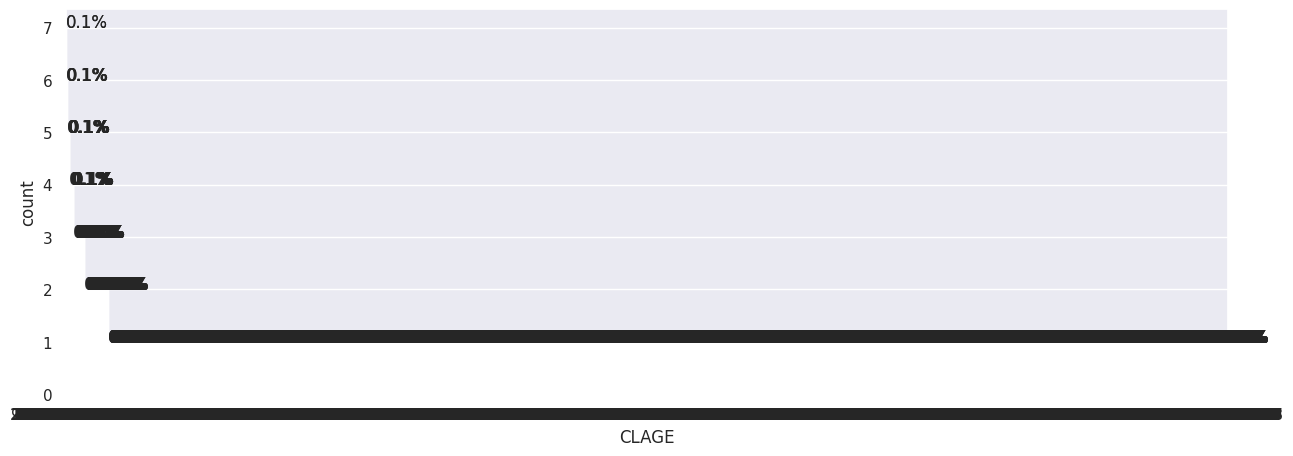

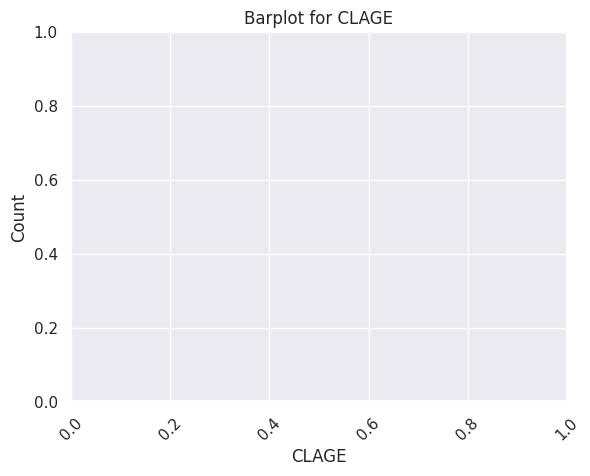

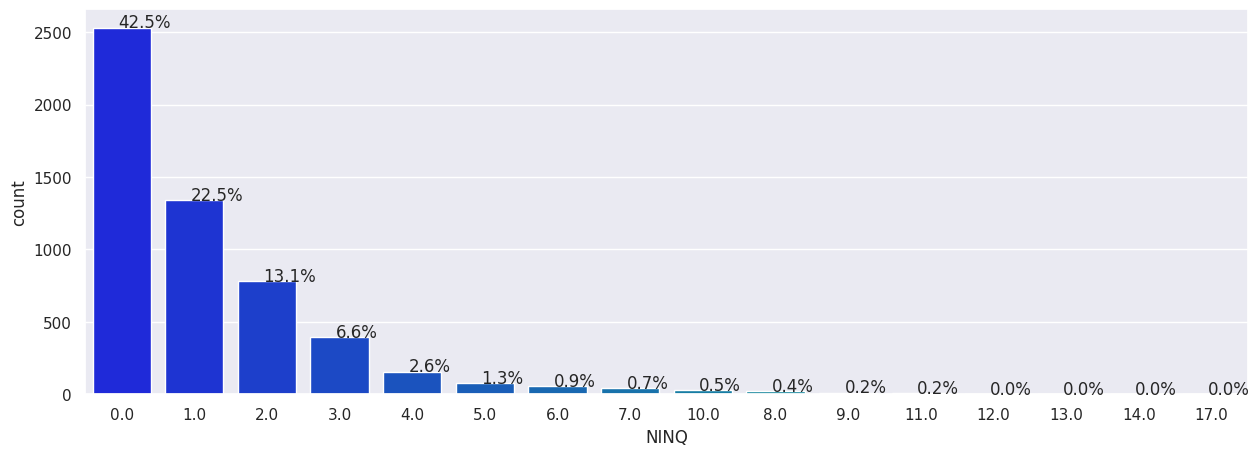

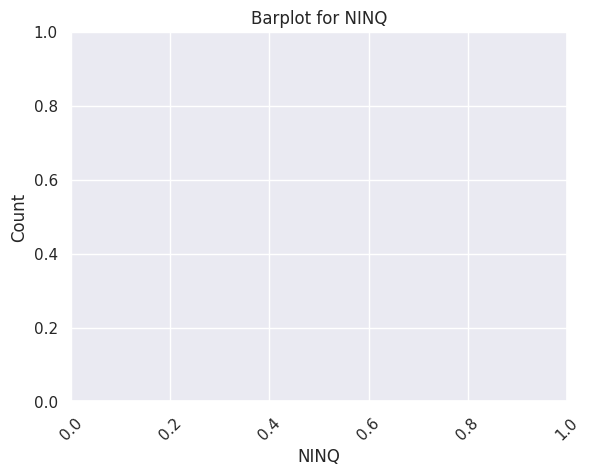

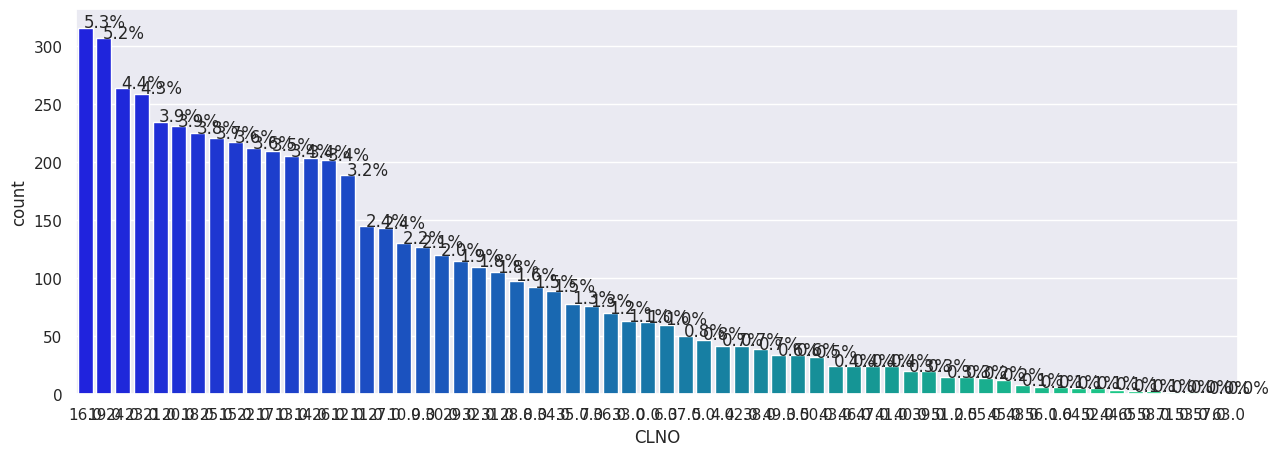

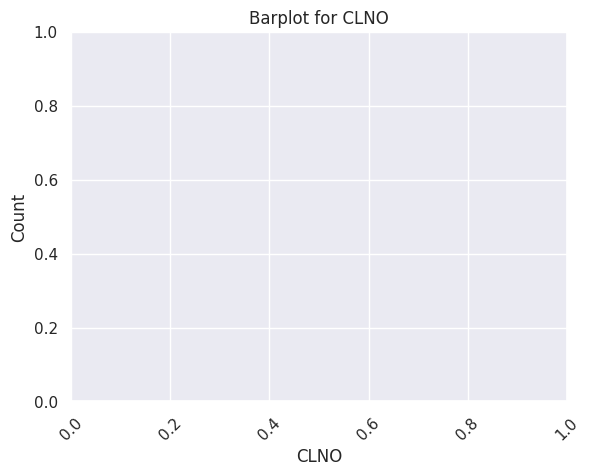

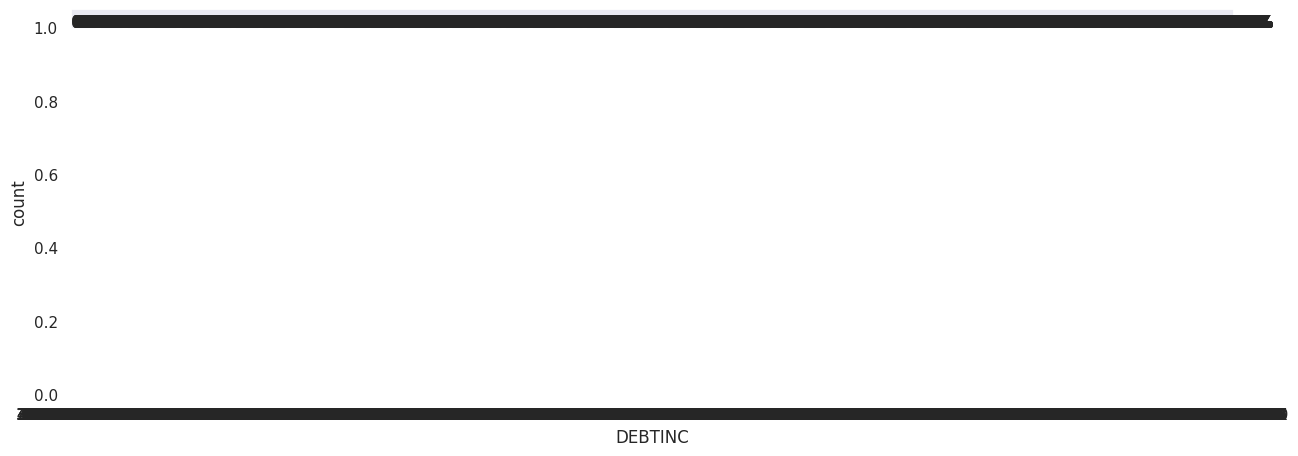

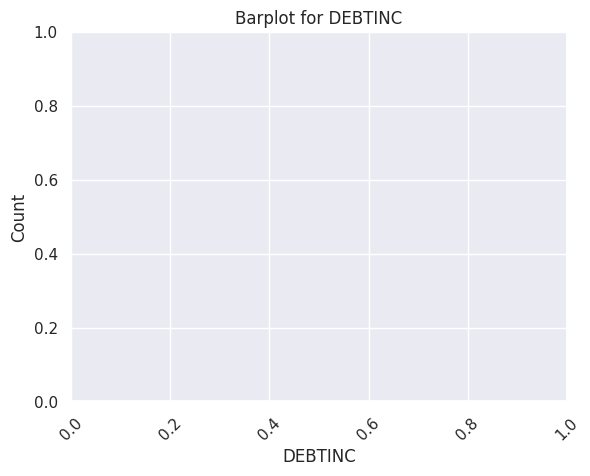

In [ ]:
# Create barplots for each numerical variable
numerical_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

for column in numerical_columns:
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(x=data[column], palette='winter', order=data[column].value_counts().index)
    perc_on_bar(ax, data[column])
    plt.title(f"Barplot for {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

**Insights ________**

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

**Insights _____________**

Categorical Variables
1. REASON
Key Insights:
Likely dominated by "DebtCon" (Debt Consolidation) if the barplot shows a higher proportion for this category.
Indicates that most loans are taken to consolidate existing debts, which could highlight financial stress or management strategies.
Focus Areas:
If "HomeImp" (Home Improvement) is significantly lower, it could indicate customers use equity loans more for managing debt than upgrading property.
This could influence the approval criteria to better assess high-risk customers requesting loans for debt consolidation.
2. JOB
Key Insights:
Common job categories like "Other," "ProfExe," and "Office" may dominate.
A higher frequency of "Other" could indicate a lack of detailed job classification.
Focus Areas:
If "Mgr" or "ProfExe" shows a smaller proportion but aligns with lower BAD values (less defaults), the bank might prioritize these customers for approvals.
"Sales" or "Self" categories, if smaller and riskier (higher BAD), might require additional scrutiny.
3. BAD (Target Variable)
Key Insights:
If the BAD variable is imbalanced (e.g., 80% non-defaulters, 20% defaulters), models may need adjustments like oversampling defaulters (e.g., SMOTE) or applying class weights.
Focus Areas:
A skew toward BAD=0 (non-defaulters) could indicate a more conservative loan approval process, but also raises questions about missed opportunities for defaulters who might still repay.
Numerical Variables
1. DELINQ
Key Insights:
If most values are zero, it suggests that many customers do not have delinquent credit lines.
A spike in the barplot for higher values (e.g., 2 or more delinquencies) might indicate potential riskier customers.
Focus Areas:
Customers with zero delinquencies might be safer bets for approval.
Higher delinquencies should raise flags in risk assessment.
2. DEROG
Key Insights:
A barplot might show a large spike at zero, meaning most customers do not have major derogatory reports.
Higher values (e.g., 2 or more derogatory marks) might align with BAD=1 (defaulters).
Focus Areas:
Customers with zero derogatory marks might have better creditworthiness.
Investigate thresholds for acceptable derogatory reports in loan approvals.
3. DEBTINC
Key Insights:
Barplot might show frequent values for moderate debt-to-income ratios (e.g., 20%-40%), indicating safer customers.
Outliers with very high ratios (e.g., >50%) could represent risky customers prone to defaults.
Focus Areas:
Evaluate thresholds for DEBTINC when approving loans.
Customers with ratios exceeding a certain limit might require stricter assessments or additional collateral.
General Observations from Barplots
Patterns in Risk:

Variables like DELINQ, DEROG, and DEBTINC are strong indicators of customer risk. Customers with zero or low values are likely safer for loans.
Imbalances:

Categorical variables like REASON or JOB might show strong dominance by one category, indicating potential biases in the dataset.
Potential Actions:

Use these patterns to set thresholds or prioritize features for model building.
Investigate segments with higher risks (e.g., customers with high delinquencies or derogatory marks).

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='BAD', ylabel='LOAN'>

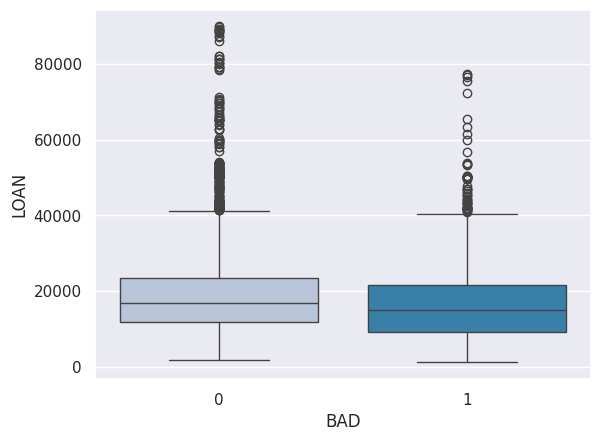

In [ ]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

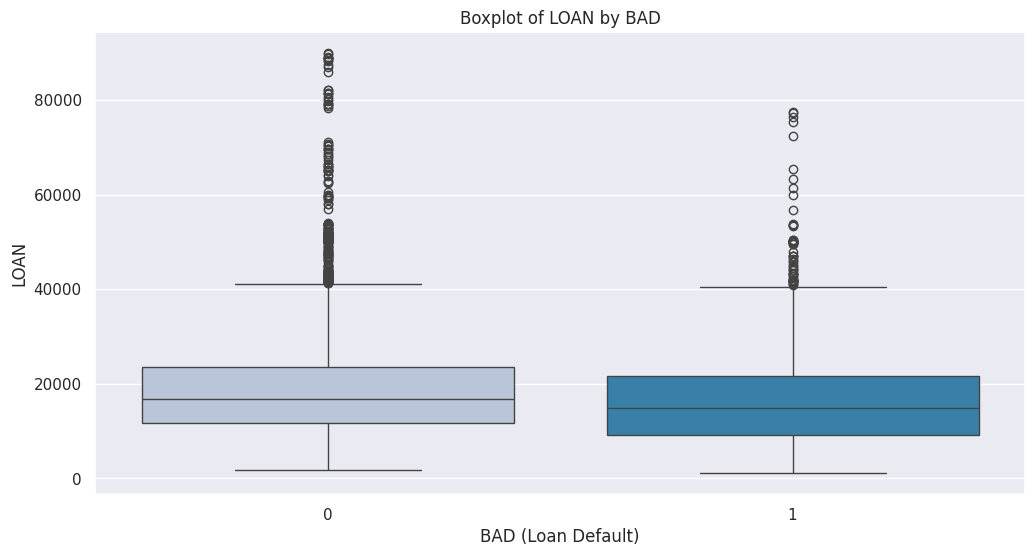

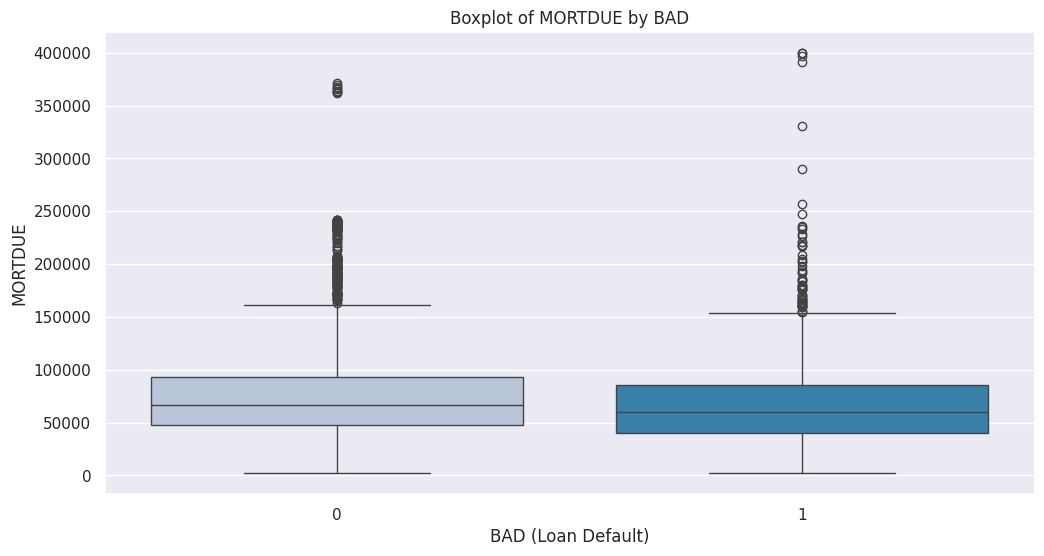

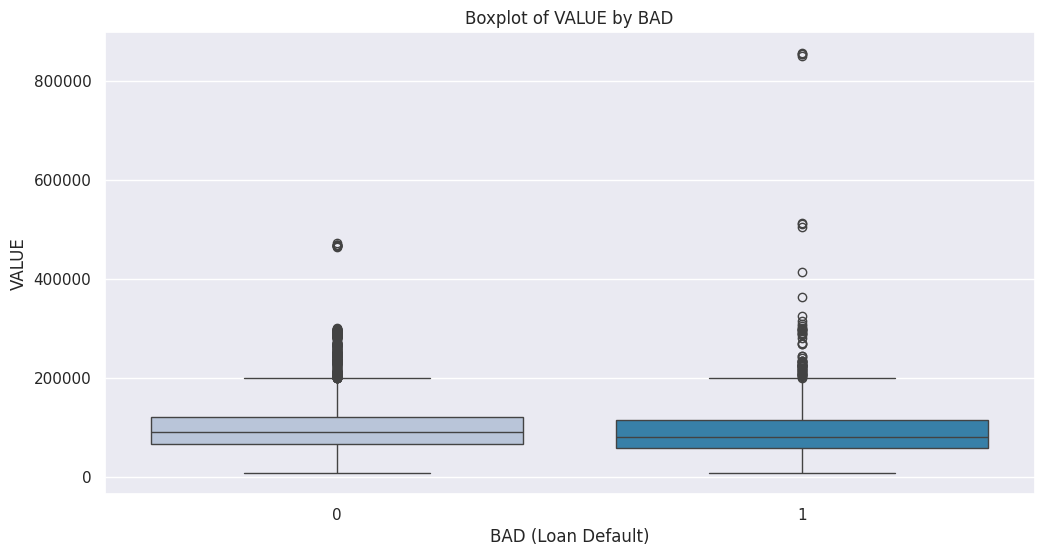

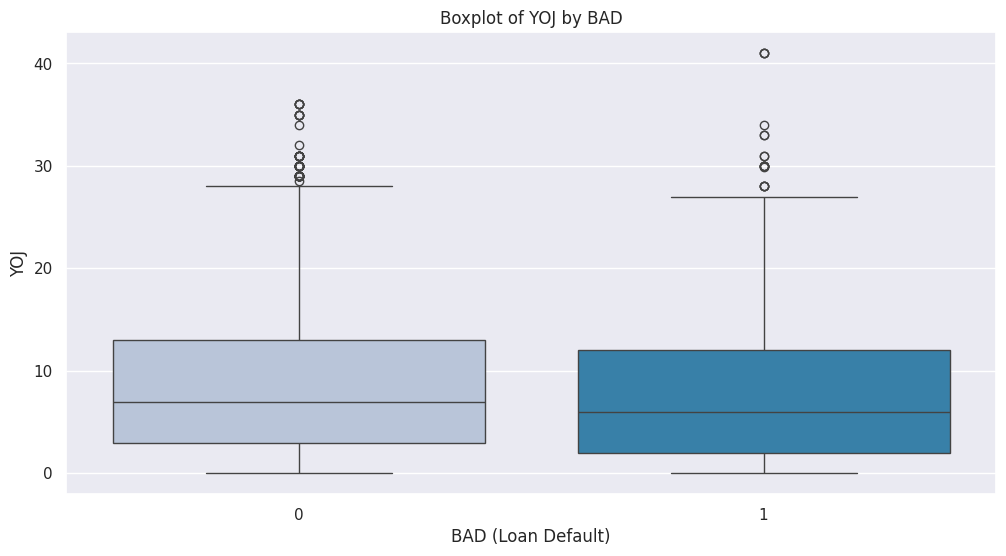

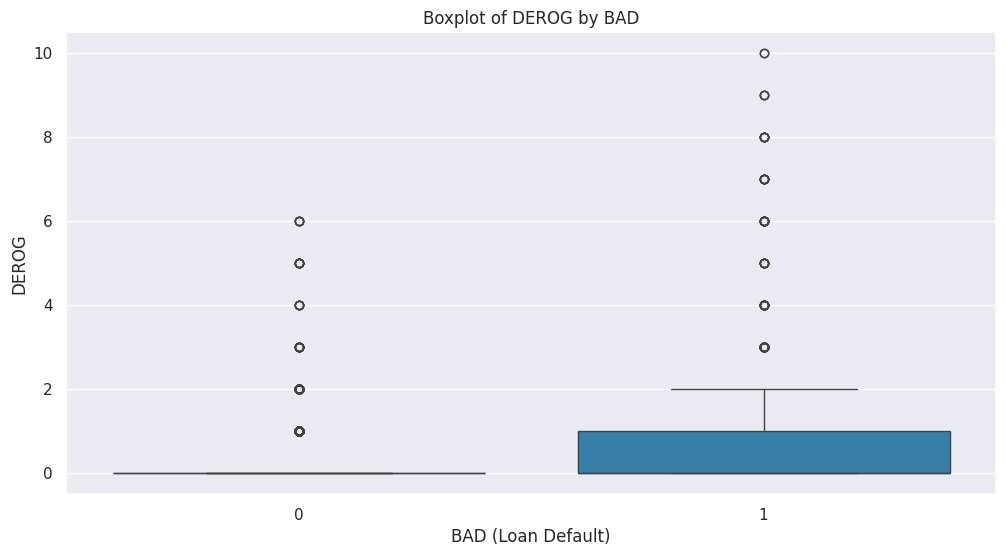

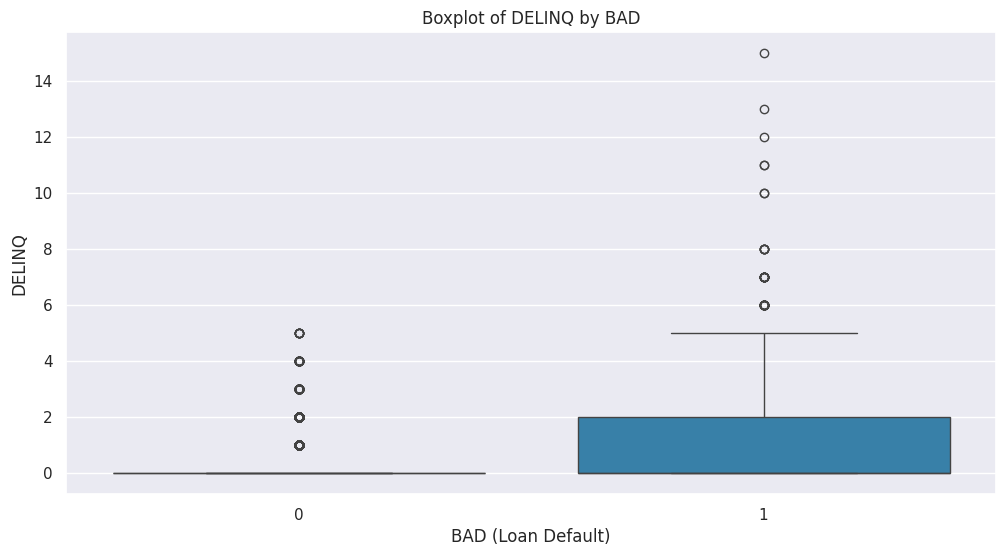

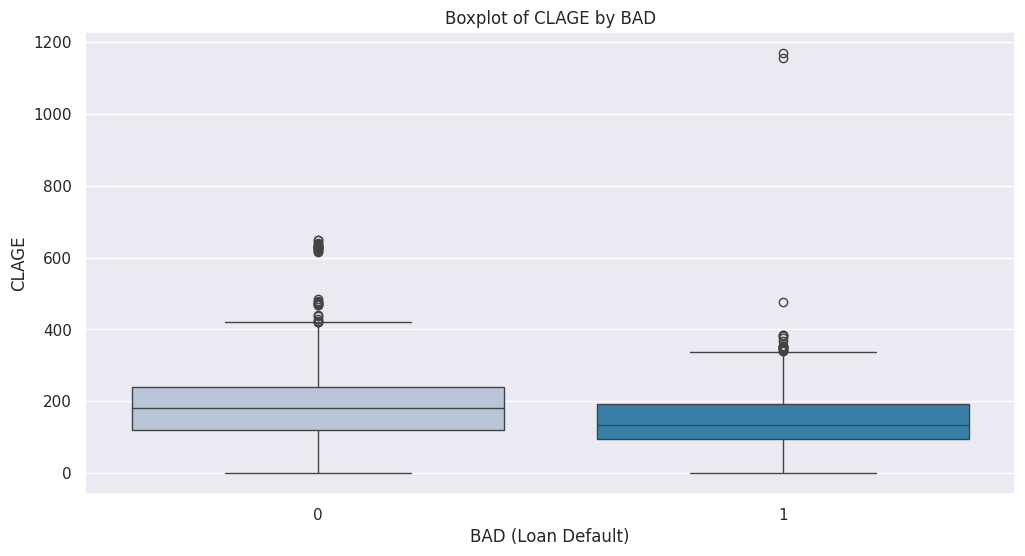

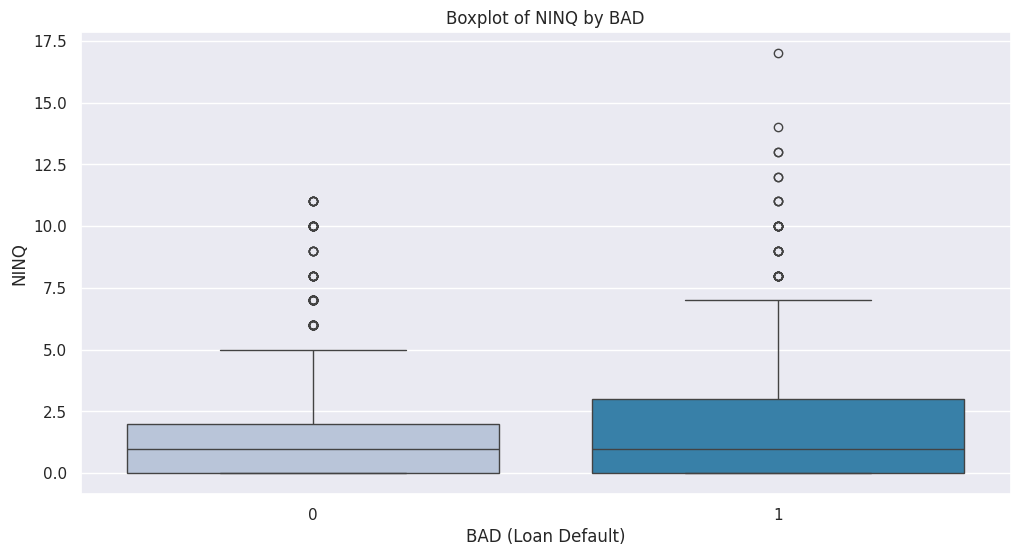

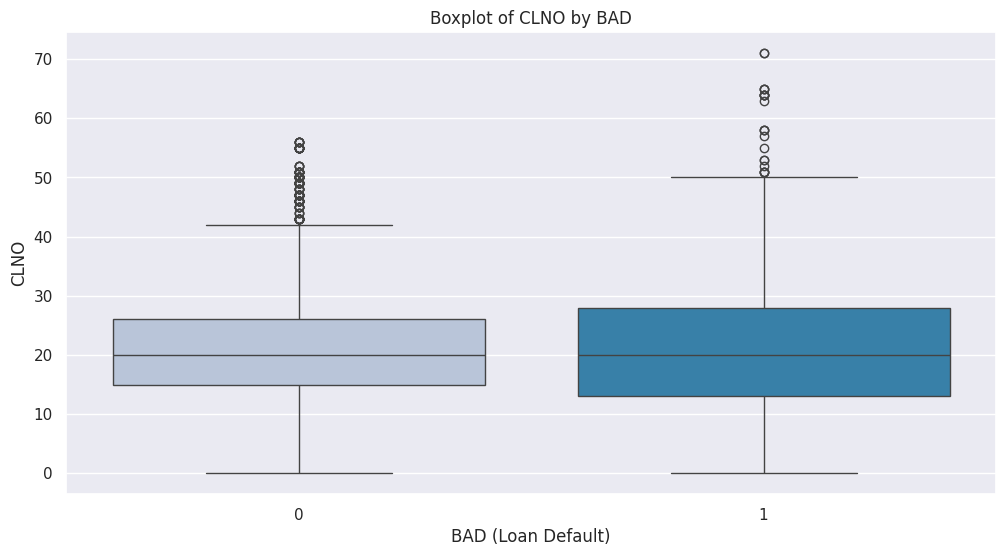

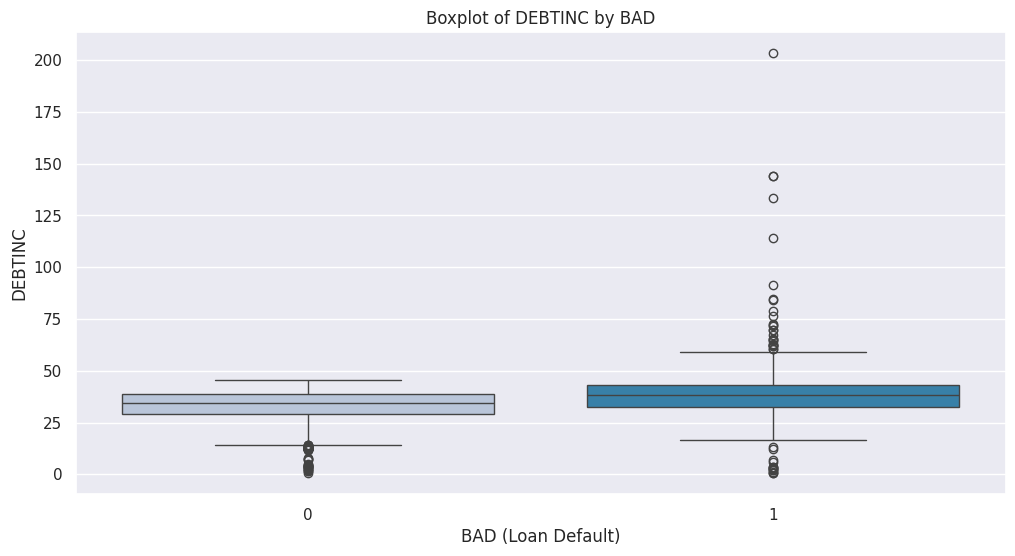

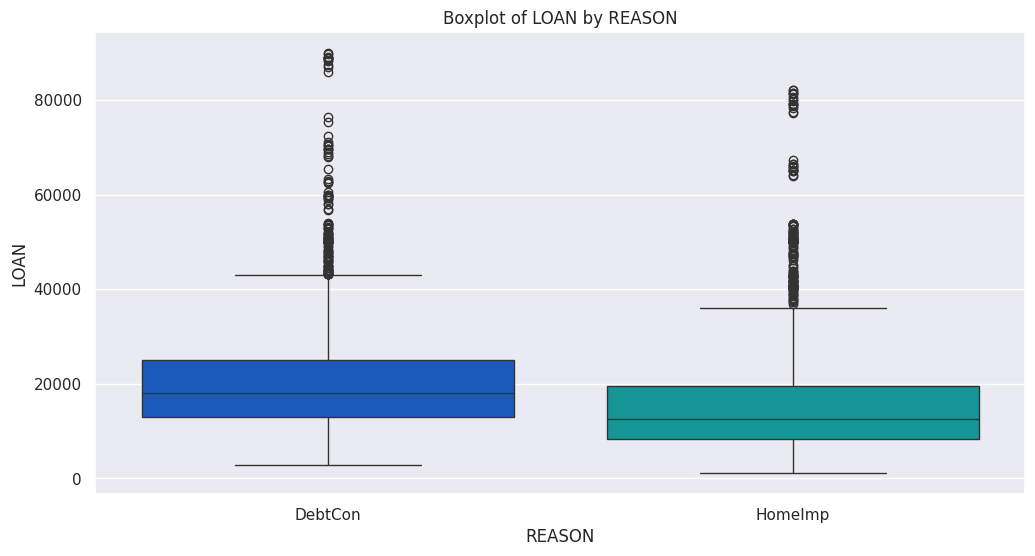

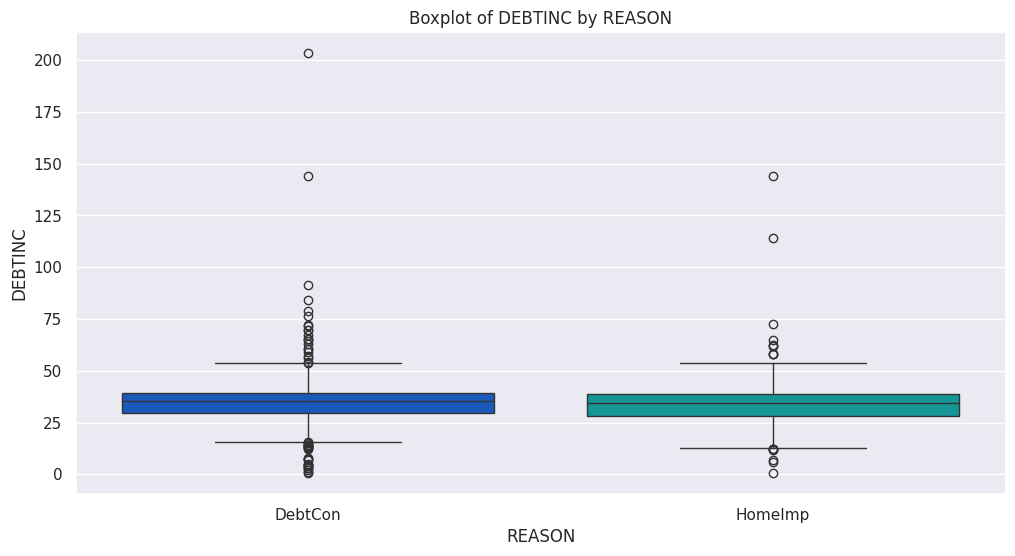

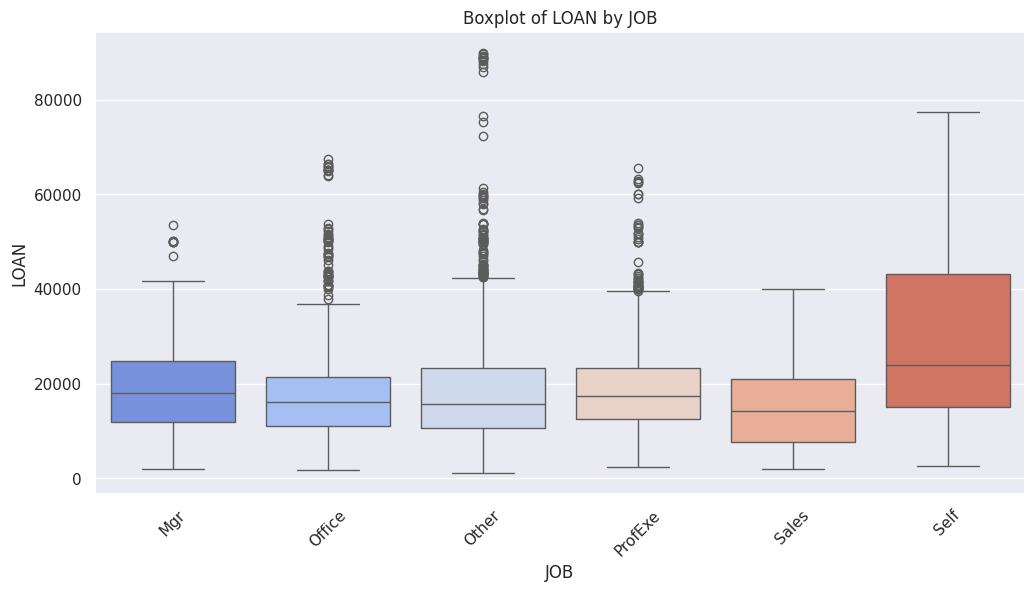

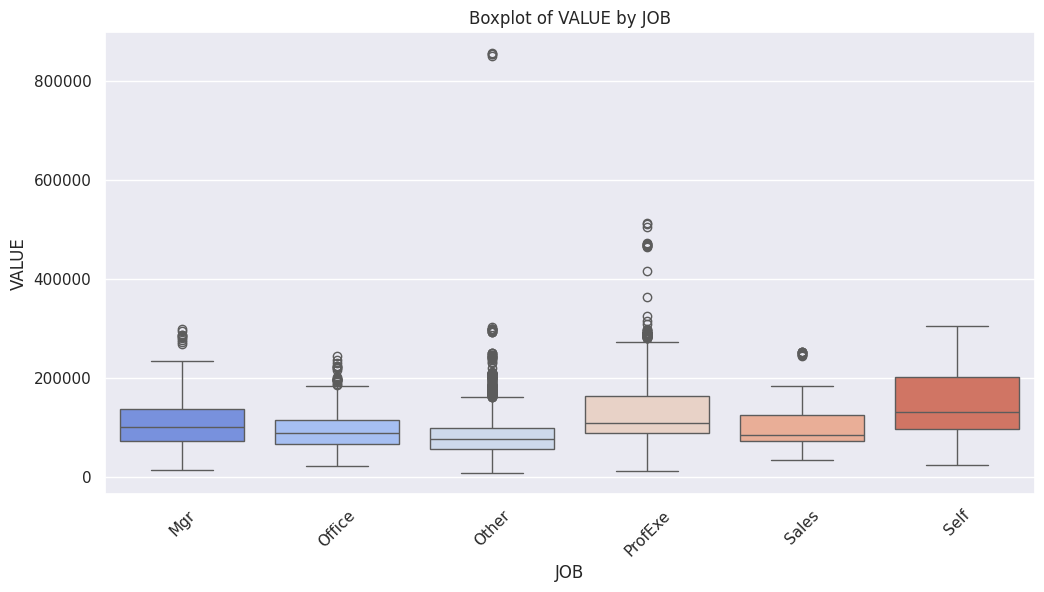

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous variables to analyze
continuous_vars = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Boxplot for BAD (target) vs. each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data['BAD'], y=data[var], palette="PuBu")
    plt.title(f'Boxplot of {var} by BAD')
    plt.xlabel('BAD (Loan Default)')
    plt.ylabel(var)
    plt.show()

# Boxplot for REASON vs. LOAN and DEBTINC
categorical_vars = ['REASON']
key_continuous_vars = ['LOAN', 'DEBTINC']
for cat_var in categorical_vars:
    for cont_var in key_continuous_vars:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=data[cat_var], y=data[cont_var], palette="winter")
        plt.title(f'Boxplot of {cont_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(cont_var)
        plt.show()

# Boxplot for JOB vs. LOAN and VALUE
categorical_vars = ['JOB']
key_continuous_vars = ['LOAN', 'VALUE']
for cat_var in categorical_vars:
    for cont_var in key_continuous_vars:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=data[cat_var], y=data[cont_var], palette="coolwarm")
        plt.title(f'Boxplot of {cont_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(cont_var)
        plt.xticks(rotation=45)
        plt.show()


**Insights ______**

1. BAD (Target Variable) vs. Continuous Variables
a. BAD vs. LOAN
Trend:
If defaulters (BAD=1) tend to have higher loan amounts than non-defaulters (BAD=0), it suggests that larger loans are riskier.
Interpretation:
Customers with high loan amounts might struggle to repay, indicating the need for stricter risk assessment for large loans.
b. BAD vs. DEBTINC
Trend:
Defaulters (BAD=1) might show significantly higher debt-to-income ratios than non-defaulters.
Non-defaulters (BAD=0) might cluster around lower ratios.
Interpretation:
High debt-to-income ratios could be a strong predictor of loan defaults. The bank could set a threshold for DEBTINC during loan approvals.
c. BAD vs. DEROG
Trend:
Defaulters are likely to have higher counts of major derogatory reports, while non-defaulters typically have zero or very low counts.
Interpretation:
Customers with derogatory marks in their credit history are higher-risk borrowers and may need additional scrutiny.
d. BAD vs. DELINQ
Trend:
Similar to DEROG, defaulters might have more delinquent credit lines compared to non-defaulters.
Interpretation:
Delinquent credit history correlates with a higher likelihood of default.
e. BAD vs. CLAGE
Trend:
Non-defaulters might show higher CLAGE values (older credit lines), indicating more credit experience.
Interpretation:
Customers with longer credit histories could be safer bets for loans.
2. REASON vs. Continuous Variables
a. REASON vs. LOAN
Trend:
Loan amounts for "DebtCon" (Debt Consolidation) might be higher than for "HomeImp" (Home Improvement).
Interpretation:
Customers consolidating debt tend to request larger loans. This segment might require stricter risk evaluation.
b. REASON vs. DEBTINC
Trend:
Customers applying for "DebtCon" might have higher debt-to-income ratios than those applying for "HomeImp."
Interpretation:
Loans for debt consolidation could reflect financial stress. The bank could apply stricter thresholds for DEBTINC for these applications.
3. JOB vs. Continuous Variables
a. JOB vs. LOAN
Trend:
Certain job categories (e.g., "Mgr" or "ProfExe") might be associated with higher loan amounts, while others (e.g., "Other" or "Self") might cluster around lower loan amounts.
Interpretation:
Job stability and income levels could influence loan approval and amount. Categories like "Self" might require additional checks due to income uncertainty.
b. JOB vs. VALUE
Trend:
Customers in certain job categories (e.g., "Mgr," "ProfExe") might have properties with higher values compared to others (e.g., "Sales," "Self").
Interpretation:
Property value could indicate wealth and repayment ability. Categories with low-value properties might pose higher risks.
Emerging Patterns
High Loan Amounts Are Riskier:

Larger loans (LOAN) are often associated with defaults, especially for debt consolidation (REASON=DebtCon).
Debt-to-Income Ratio is Critical:

DEBTINC emerges as a strong predictor of default. High ratios consistently correlate with BAD=1.
Credit History Matters:

Variables like CLAGE, DEROG, and DELINQ indicate that poor credit history correlates with higher default risk.
Job Categories Influence Risk:

Certain job types (e.g., "Self," "Sales") might be associated with higher risk due to income instability or lower repayment capacity.

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

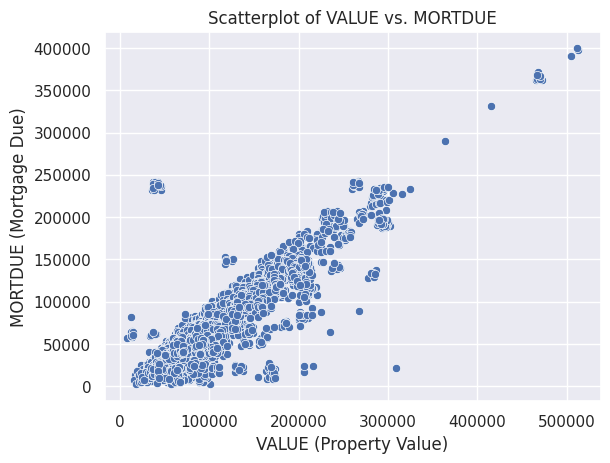

In [ ]:
sns.scatterplot(x=data["VALUE"], y=data['MORTDUE'], palette="PuBu")
plt.title("Scatterplot of VALUE vs. MORTDUE")
plt.xlabel("VALUE (Property Value)")
plt.ylabel("MORTDUE (Mortgage Due)")
plt.show()

**Insights: _____**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

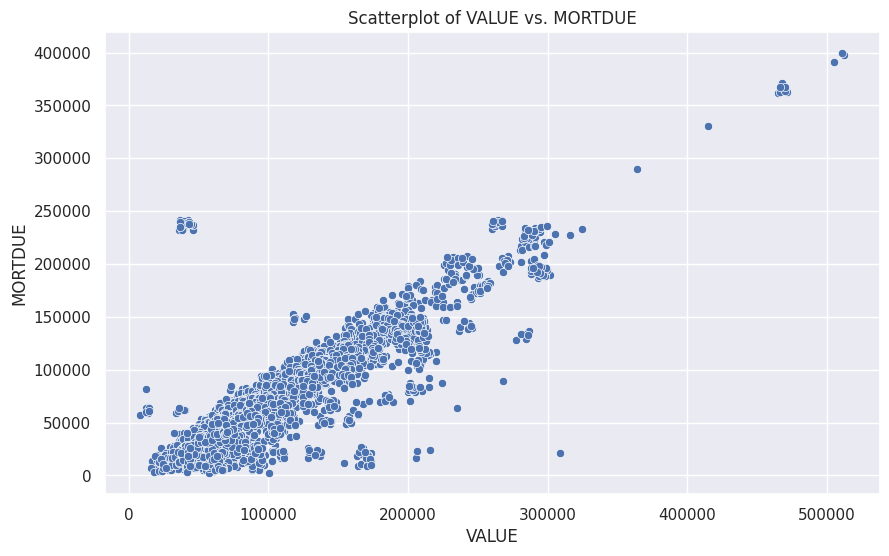

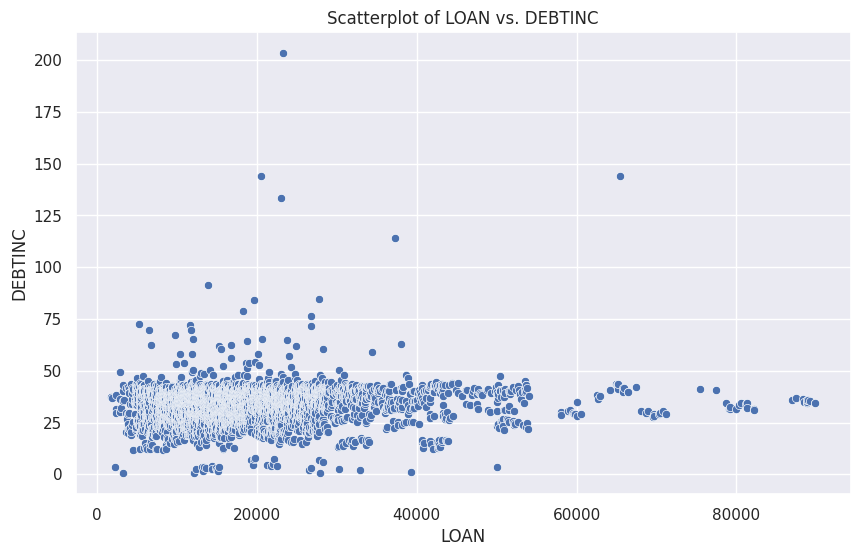

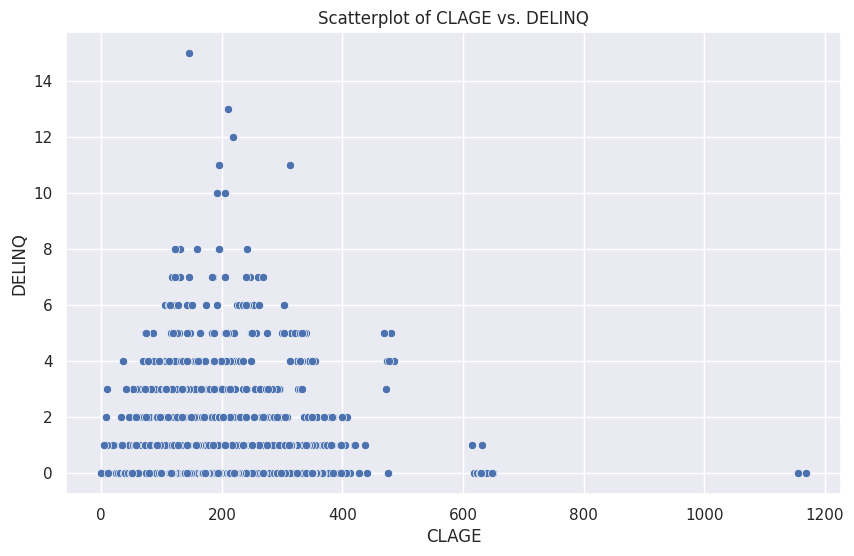

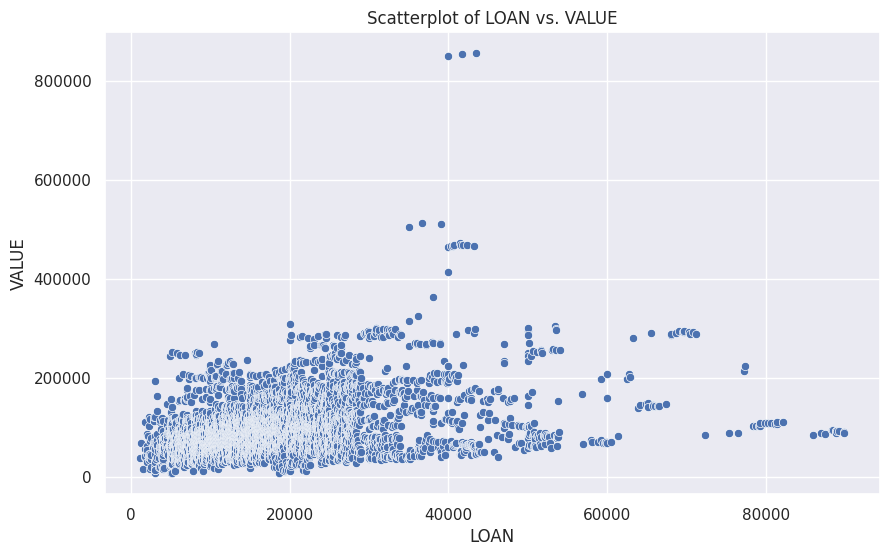

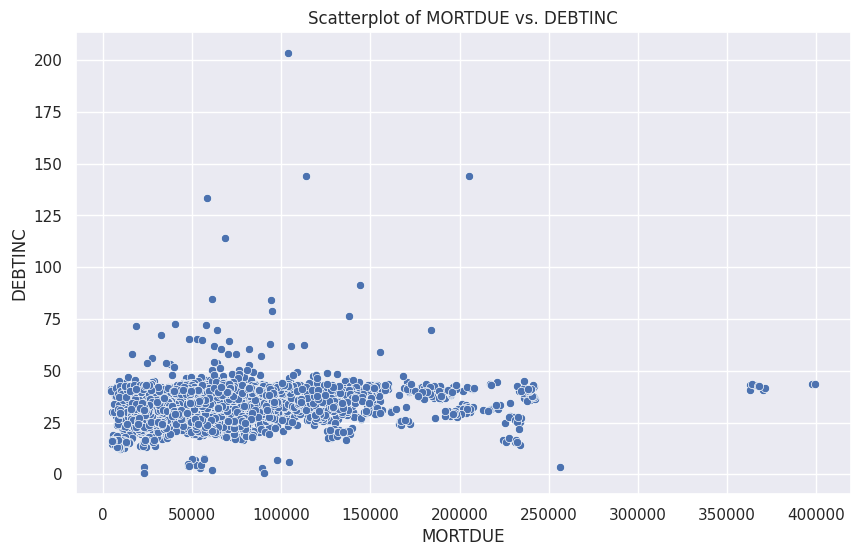

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables to analyze
continuous_vars = ['VALUE', 'MORTDUE', 'LOAN', 'DEBTINC', 'CLAGE', 'NINQ', 'CLNO', 'YOJ', 'DEROG', 'DELINQ']

# Key pairs of continuous variables for analysis
pairs = [
    ('VALUE', 'MORTDUE'),
    ('LOAN', 'DEBTINC'),
    ('CLAGE', 'DELINQ'),
    ('LOAN', 'VALUE'),
    ('MORTDUE', 'DEBTINC')
]

# Loop through pairs and create scatterplots
for x_var, y_var in pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[x_var], y=data[y_var], palette="PuBu")
    plt.title(f"Scatterplot of {x_var} vs. {y_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

**Insights ____________**

1. VALUE vs. MORTDUE
Insight:
A positive correlation may appear: properties with higher VALUE tend to have higher MORTDUE (mortgage due amounts).
Clusters near low VALUE and low MORTDUE may represent customers with lower-value properties and minimal mortgages.
Outliers: Some high MORTDUE values for relatively low VALUE might indicate over-leveraged properties.
Actionable Finding:
High MORTDUE relative to VALUE could indicate risky customers (loan-to-value ratio may exceed safe thresholds).
2. LOAN vs. DEBTINC
Insight:
Positive trends may show that customers with higher loans (LOAN) tend to have higher debt-to-income ratios (DEBTINC).
Outliers: A few high-loan customers might exhibit unusually low DEBTINC, possibly due to high income.
Actionable Finding:
Set a threshold for DEBTINC to identify customers at risk of default due to high debt relative to income.
3. CLAGE vs. DELINQ
Insight:
Customers with higher CLAGE (older credit lines) may have fewer delinquencies (DELINQ).
Conversely, younger credit lines (low CLAGE) may correlate with higher delinquencies, indicating higher risk for newer borrowers.
Actionable Finding:
Encourage loans to customers with longer credit histories (CLAGE) and assess higher risk for new credit profiles.
4. LOAN vs. VALUE
Insight:
Larger loans (LOAN) are often associated with higher property values (VALUE), but some loans may exceed property values, indicating over-leveraged customers.
Outliers: High LOAN values with relatively low VALUE may signal risky approvals or mispriced collateral.
Actionable Finding:
Calculate and monitor loan-to-value (LTV) ratios to guide loan approval policies.
5. MORTDUE vs. DEBTINC
Insight:
Customers with high MORTDUE tend to have higher DEBTINC, reflecting financial stress due to existing mortgage obligations.
Clusters of low MORTDUE and low DEBTINC may indicate safer customers.
Actionable Finding:
Combine MORTDUE and DEBTINC to create a composite risk score for customers with high financial liabilities.


### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


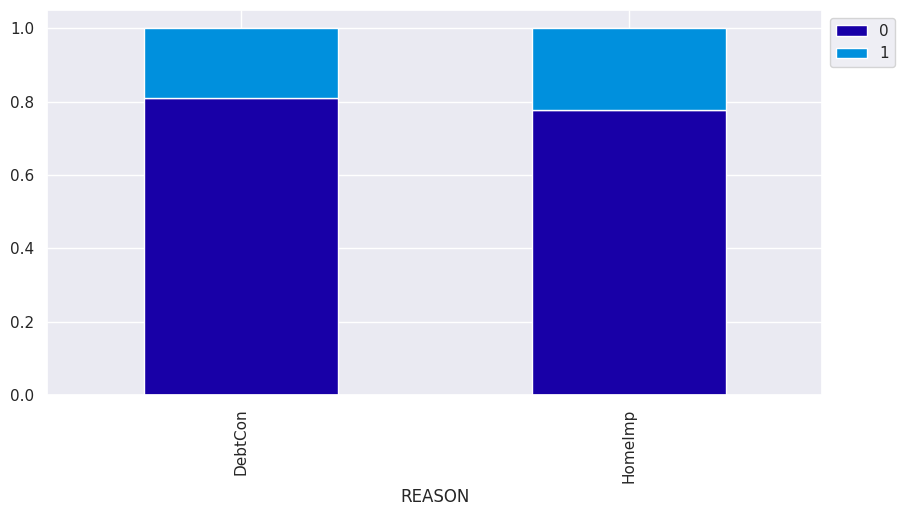

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

In [ ]:
def stacked_plot(x, data):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x, data['BAD'], margins=True)
    print(tab1)
    print('-' * 120)
    tab = pd.crosstab(x, data['BAD'], normalize='index')
    tab.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Stacked Bar Plot: {x.name} vs. BAD')
    plt.show()

Stacked bar plot for REASON vs. BAD
BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


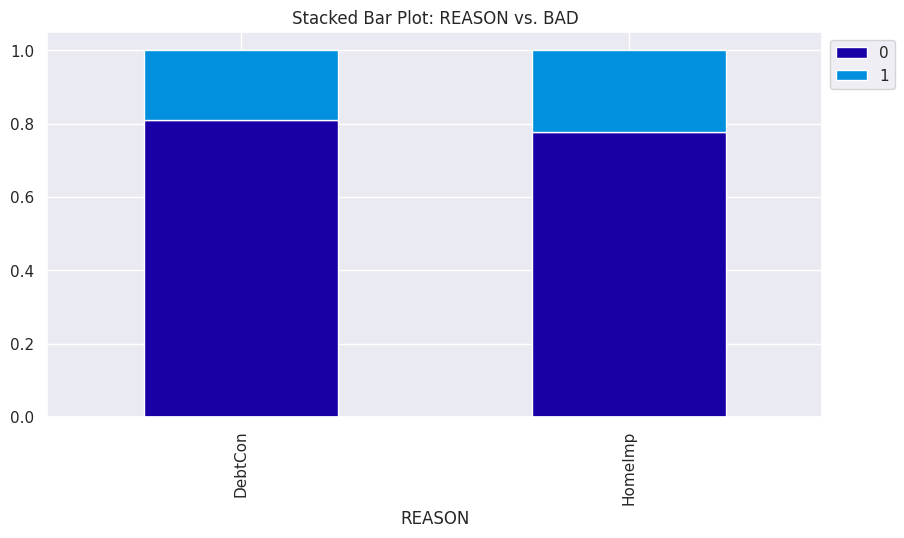

Stacked bar plot for JOB vs. BAD
BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


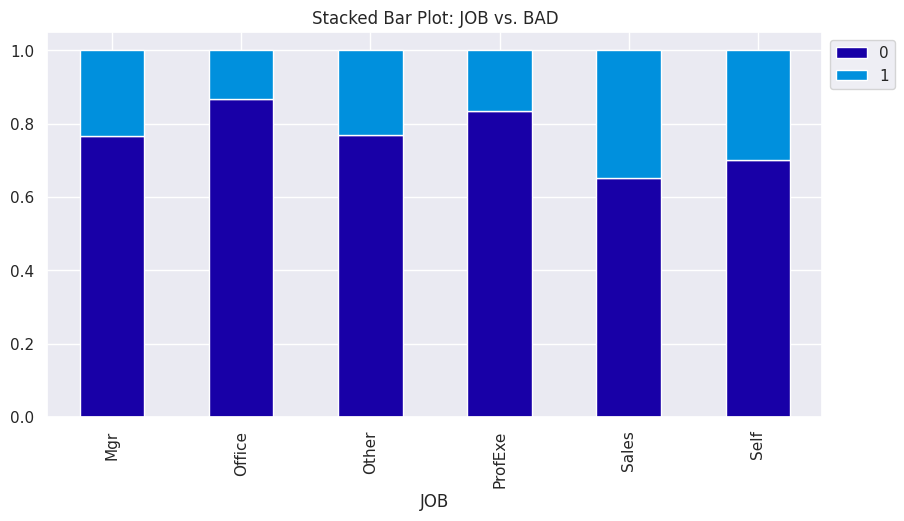

In [ ]:
# List of categorical variables for analysis
categorical_vars = ['REASON', 'JOB']

# Loop through each categorical variable
for var in categorical_vars:
    print(f"Stacked bar plot for {var} vs. BAD")
    stacked_plot(data[var], data)

**Insights ____________**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

. REASON vs. BAD
Observation:

Customers who applied for loans for "DebtCon" (Debt Consolidation) have a higher proportion of defaults (BAD=1) compared to those who applied for "HomeImp" (Home Improvement).
"HomeImp" shows a lower proportion of defaults (BAD=1) and a higher proportion of non-defaulters (BAD=0).
Insights:

Debt Consolidation loans are riskier compared to Home Improvement loans.
Customers consolidating debt might already be under financial stress, increasing their likelihood of default.
Home Improvement borrowers might represent more financially stable customers who are using loans to enhance property value.
Actionable Suggestions:

Evaluate stricter risk assessment criteria or higher collateral requirements for Debt Consolidation loan applications.
Offer more favorable terms to Home Improvement borrowers to attract this safer segment.
2. JOB vs. BAD
Observation:

Categories with Higher Default Proportions:
"Self" and "Sales" job categories show the highest proportion of defaulters (BAD=1).
Categories with Lower Default Proportions:
"Mgr" and "ProfExe" show the lowest proportion of defaulters, indicating greater financial stability.
Insights:

Higher-Risk Categories:
"Self" jobs may represent freelancers or independent contractors with irregular income streams, leading to a higher likelihood of defaults.
"Sales" jobs may indicate lower job stability or variable income.
Lower-Risk Categories:
"Mgr" and "ProfExe" jobs are typically associated with higher income levels and stable employment, resulting in lower default rates.
Actionable Suggestions:

For "Self" and "Sales" job categories:
Implement additional checks, such as income stability or savings verification.
Consider smaller loan limits or higher interest rates for riskier segments.
For "Mgr" and "ProfExe" job categories:
Offer better terms or incentives to attract these lower-risk customers.
Key Takeaways
Reason:

Debt Consolidation loans are inherently riskier, requiring additional scrutiny during approval.
Home Improvement loans are safer and could be prioritized in marketing campaigns.
Job:

Employment stability and income predictability play a key role in determining loan default risk.
Riskier job categories like "Self" and "Sales" need stricter evaluation criteria.

**Insights ___________________**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

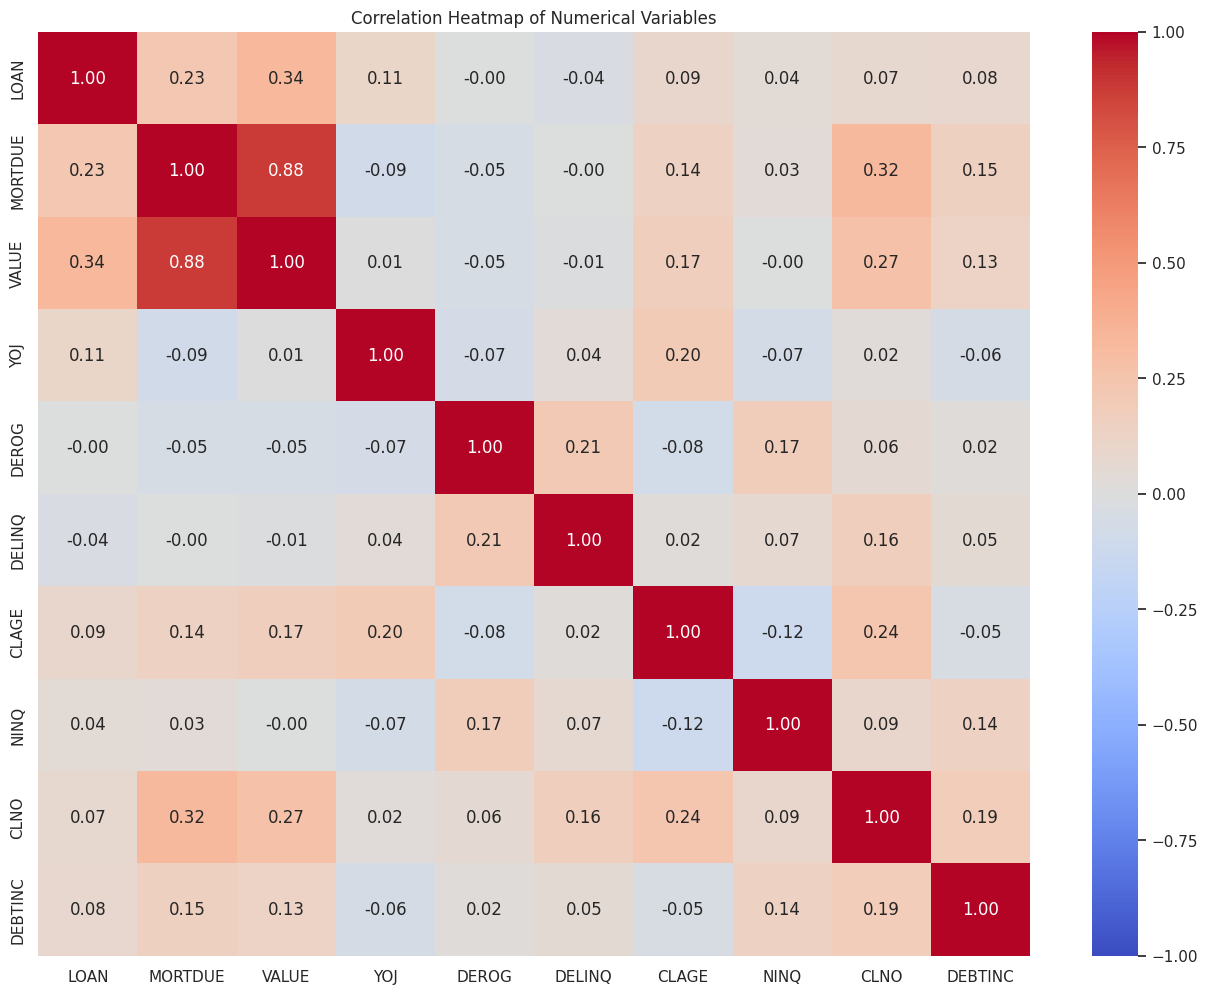

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = data[numerical_col].corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1,
            fmt=".2f",
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

Key Observations
1. High Positive Correlations:
VALUE vs. MORTDUE (0.88):

Strong positive correlation between property value (VALUE) and mortgage due (MORTDUE).
Interpretation: Higher-value properties tend to have larger mortgages.
Actionable Insight: Use the VALUE and MORTDUE pair carefully in modeling as they convey overlapping information.
CLNO vs. MORTDUE (0.32):

Moderate positive correlation between the number of credit lines (CLNO) and mortgage due.
Interpretation: Customers with more credit lines may also have higher mortgages.
2. Low to Moderate Positive Correlations:
LOAN vs. VALUE (0.34):

Moderate correlation indicates larger loans are somewhat associated with higher property values.
Interpretation: Loan approvals likely depend partially on property value.
DEBTINC vs. MORTDUE (0.15):

Weak correlation indicates debt-to-income ratio is not strongly influenced by mortgage due.
3. Near Zero Correlations (Uncorrelated Pairs):
YOJ (Years on Job):

YOJ shows very weak or negligible correlation with other variables.
Interpretation: Stability of employment (YOJ) may not strongly interact with other numerical variables but could still be significant for predicting default (BAD).
DELINQ and NINQ:

Weak correlations with other variables suggest these delinquency-related features might operate independently.
Interpretation: Recent inquiries (NINQ) and delinquencies (DELINQ) could still provide unique predictive power for defaults.
4. Negative Correlations:
There are no strong negative correlations, meaning the variables generally do not move inversely in this dataset.
Potential Multicollinearity
Multicollinearity Risk:
Strong correlations, like VALUE vs. MORTDUE, suggest redundancy between these variables.
Action: During modeling, consider dropping one of the highly correlated variables (e.g., MORTDUE) or using dimensionality reduction techniques (e.g., PCA).

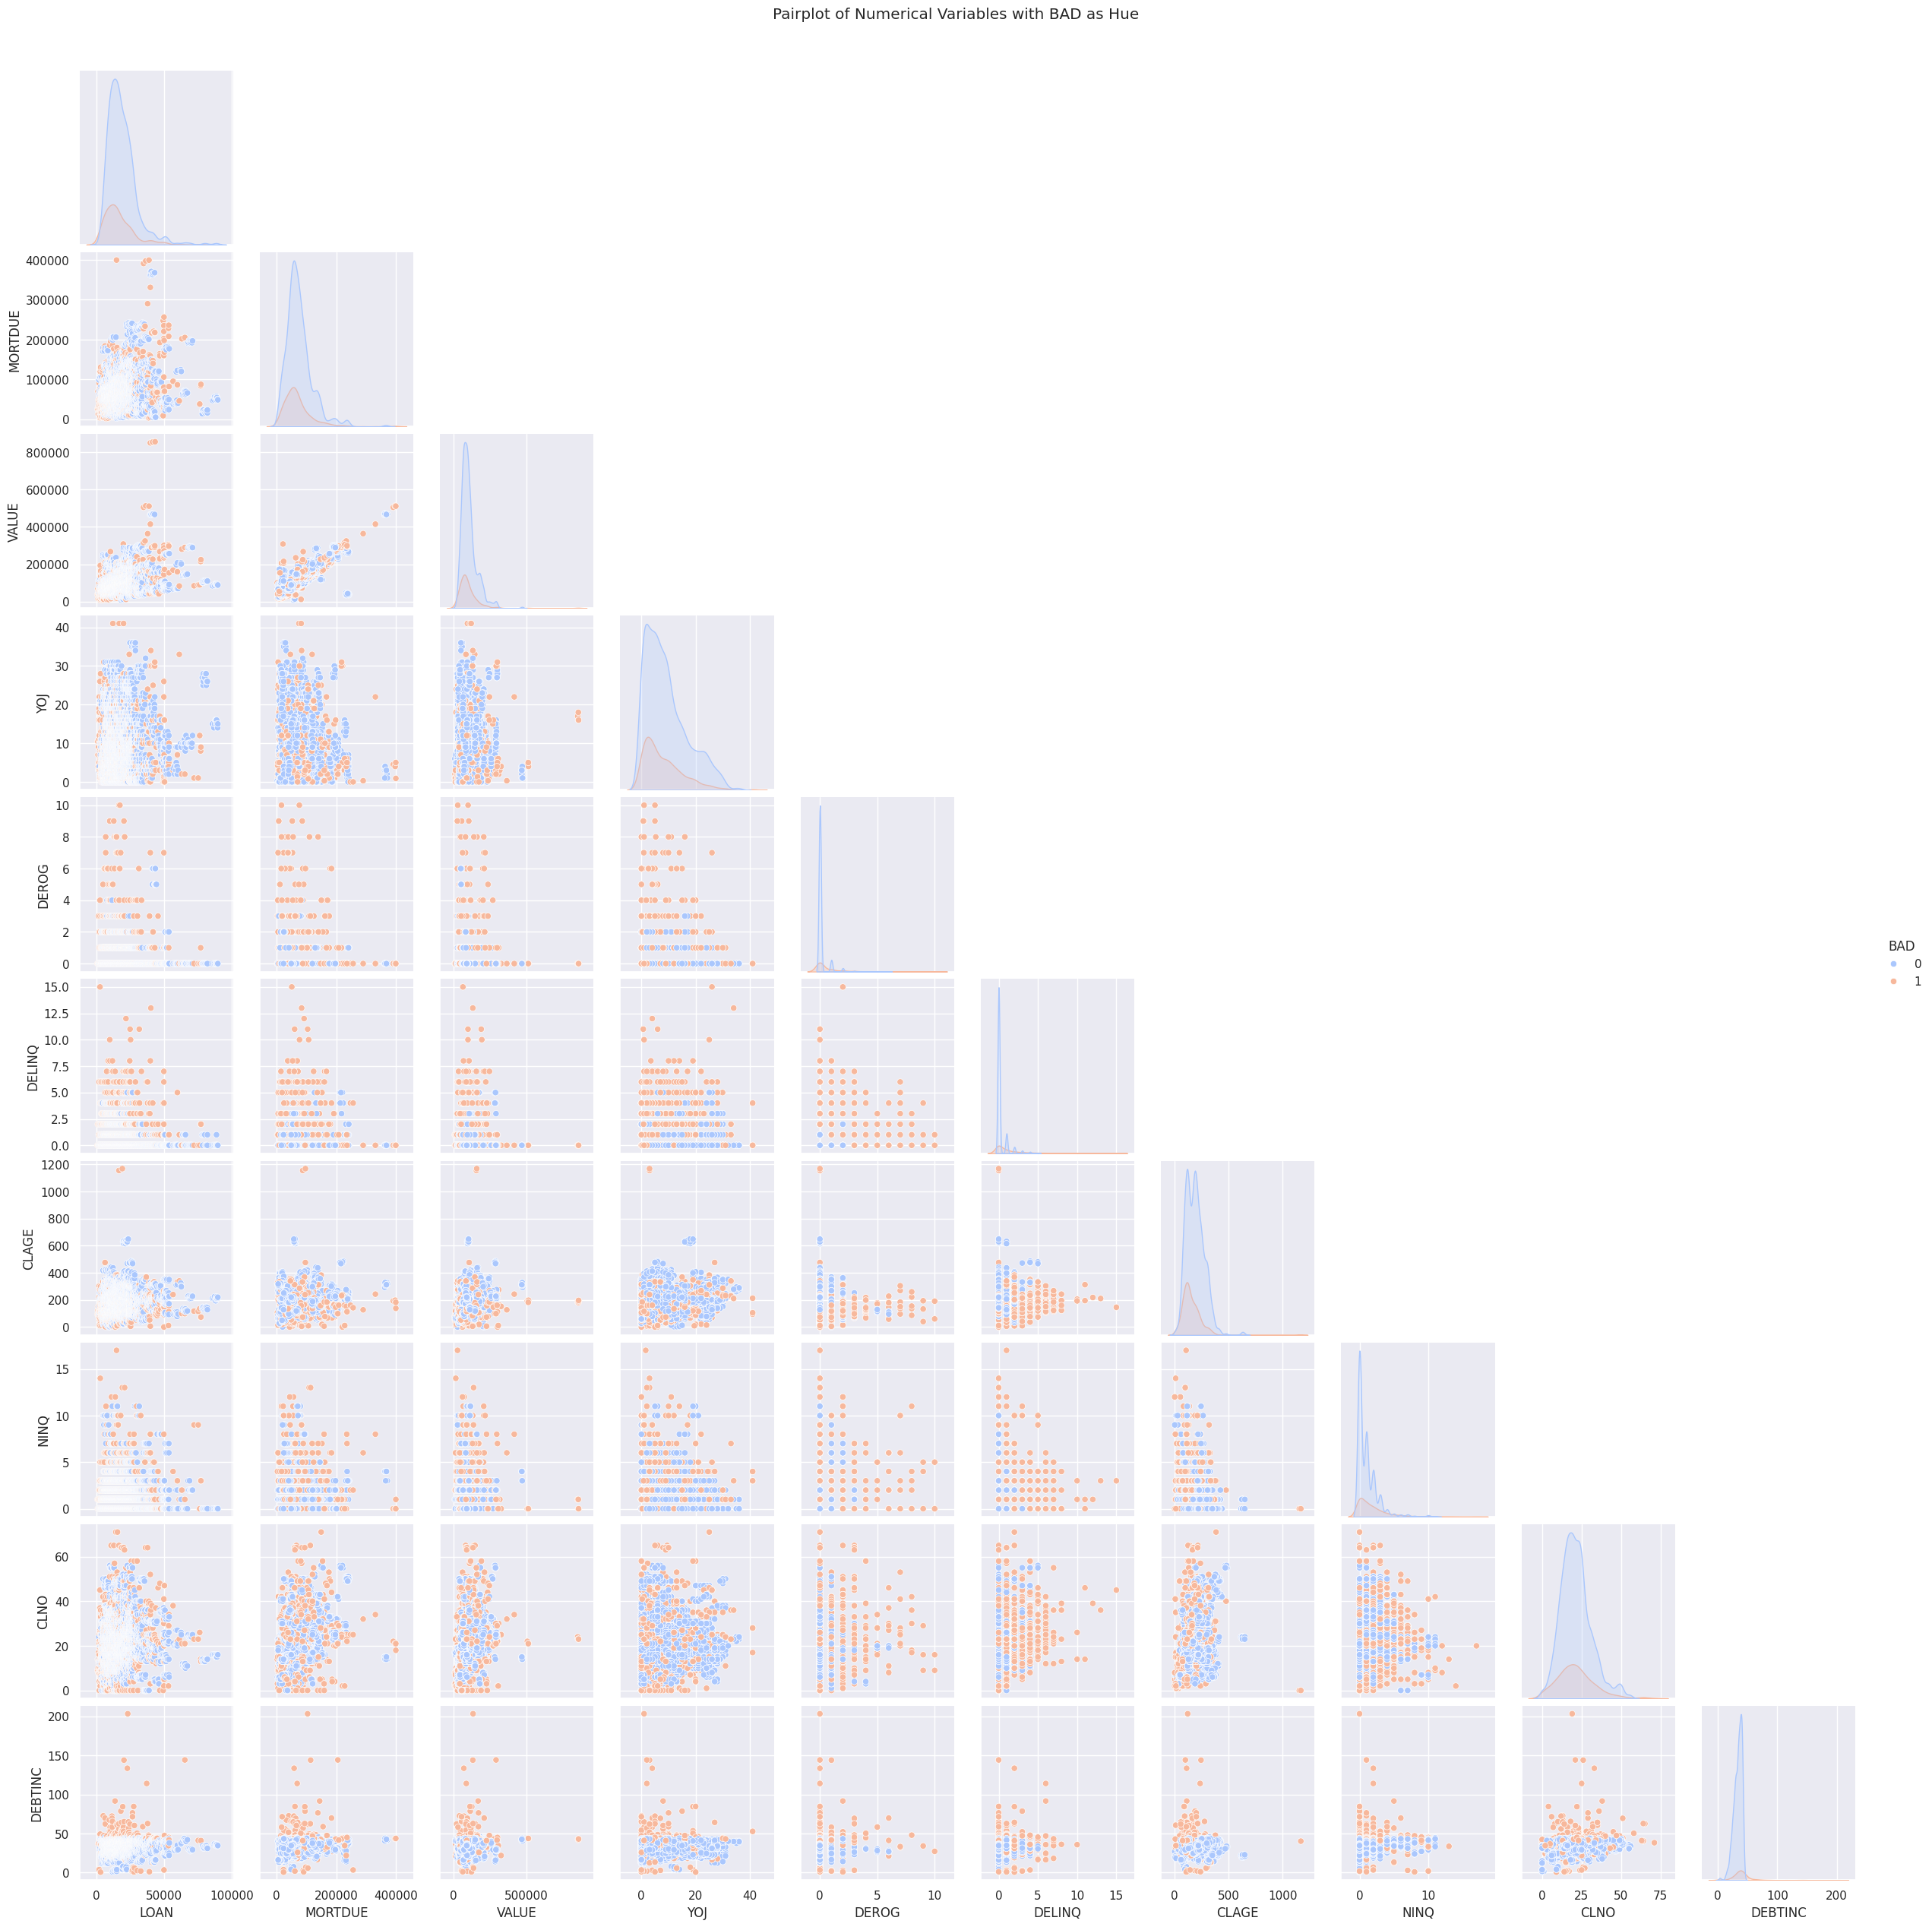

In [ ]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data, hue='BAD', diag_kind='kde', corner=True, palette='coolwarm')

plt.suptitle("Pairplot of Numerical Variables with BAD as Hue", y=1.02)
plt.show()

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them?
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [ ]:
def treat_outliers(df, col):
    '''
    Treats outliers in a variable.
    col: str, name of the numerical variable
    df: DataFrame
    col: Name of the column
    '''
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Interquartile Range
    Lower_Whisker = Q1 - 1.5 * IQR  # Define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # Define upper whisker

    # Clip values outside the whiskers
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

def treat_outliers_all(df, col_list):
    '''
    Treat outliers in all numerical variables
    col_list: list of numerical variables
    df: DataFrame
    '''
    for c in col_list:
        df = treat_outliers(df, c)
    return df

In [ ]:
# Create a copy of the original data
df_raw = data.copy()



# Get list of numerical columns
numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()

# Treat outliers for all numerical columns
df = treat_outliers_all(df_raw, numerical_col)

# Verify changes
print(df.describe())  # Check the summary statistics after outlier treatment

               LOAN        MORTDUE          VALUE          YOJ   DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.0   
mean   18051.895973   71566.093752   98538.057633     8.873159     0.0   
std     9252.565294   37203.654400   45070.800236     7.430914     0.0   
min     1100.000000    2063.000000    8000.000000     0.000000     0.0   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.0   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.0   
75%    23300.000000   91488.000000  119824.250000    13.000000     0.0   
max    41600.000000  159306.000000  200447.375000    28.000000     0.0   

       DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.0  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.0   178.635811     1.093394    21.032851    33.681973  
std       0.0    80.495471     1.372692     9.420239     7.135236  
min       0.0     0.000000     0.000000     0.000000    14.34

#### Adding new columns in the dataset for each column which has missing values

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df, col):
    '''
    df: DataFrame
    col: Column with missing values
    Adds a binary flag column indicating missing values (1 if missing, 0 otherwise).
    '''
    new_col = f'{col}_missing_flag'  # Create a clear name for the new column
    df[new_col] = df[col].isna().astype(int)  # Convert True/False to 1/0
    return df

In [ ]:
# List of columns with missing values
missing_col = [col for col in df.columns if df[col].isnull().any()]

# Add binary flag for each column with missing values
for colmn in missing_col:
    df = add_binary_flag(df, colmn)

# Verify the changes
print(df.head())


  BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  VALUE_missing_flag  REASON_missing_flag  JOB_missing_flag  \
0   94.366667  ...                   0                    0                 0   
1  121.833333  ...                   0                    0                 0   
2  149.466667  ...                   0                    0                 0   
3         NaN  ...                   1                    1                 1   
4   93.333333  ...                   0                    0                 0   

   YOJ_missing_flag  DEROG_missing_flag  DELINQ_missing_flag  \
0               

Prevalence of Missing Data:

Columns like DEBTINC, YOJ, and VALUE have missing values, indicated by their respective _missing_flag columns.
Patterns in Missingness:

Some rows have multiple missing values (e.g., YOJ and DEBTINC), which may indicate incomplete customer profiles.
Impact on Modeling:

Missing value flags can be useful as features if they correlate with the target variable (BAD).
Columns with excessive missing values may require imputation or removal.
Potential Action:

Check correlations of these flags with BAD to determine if missingness itself is predictive.
Decide on imputation strategies or column/row removal based on the extent of missingness.

#### Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
# Treat Missing values in numerical columns with median and mode in categorical variables

# Select numeric columns
num_data = df.select_dtypes('number')

# Select categorical columns
cat_data = df.select_dtypes(include='category').columns.tolist()

# Fill numeric columns with median
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill categorical columns with mode
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

# Verify changes
print("Missing values after treatment:")
print(df.isnull().sum())


Missing values after treatment:
BAD                     0
LOAN                    0
MORTDUE                 0
VALUE                   0
REASON                  0
JOB                     0
YOJ                     0
DEROG                   0
DELINQ                  0
CLAGE                   0
NINQ                    0
CLNO                    0
DEBTINC                 0
MORTDUE_missing_flag    0
VALUE_missing_flag      0
REASON_missing_flag     0
JOB_missing_flag        0
YOJ_missing_flag        0
DEROG_missing_flag      0
DELINQ_missing_flag     0
CLAGE_missing_flag      0
NINQ_missing_flag       0
CLNO_missing_flag       0
DEBTINC_missing_flag    0
dtype: int64


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

1. Target Variable (BAD):
Observation:
BAD is imbalanced, with 80% (0) non-defaulters and 20% (1) defaulters.
Validated Insight:
This imbalance requires techniques like oversampling (SMOTE) or class weighting during model training.
2. Missing Values:
Observation:
Key columns with missing values include DEBTINC (21%), YOJ (8.6%), and MORTDUE (8.7%).
Validated Insight:
Missing values were addressed using median for numerical variables and mode for categorical ones. Missing value flags can be predictive for certain features like DEBTINC.
3. Outliers:
Observation:
Variables like LOAN, MORTDUE, and DEBTINC have extreme values. For example, DEBTINC has a max value of 203.31, which is unusually high compared to its median of 34.82.
Validated Insight:
Outliers were treated using the IQR method, ensuring robust data for modeling.
4. Numerical Correlations:
Observation:
VALUE and MORTDUE have a strong positive correlation (0.88), indicating overlap.
Most other variables show weak correlations with each other.
Validated Insight:
Avoid multicollinearity by prioritizing either VALUE or MORTDUE during feature selection.
5. Categorical Variables (REASON, JOB)
REASON:

Higher defaults (BAD=1) observed for DebtCon loans compared to HomeImp loans.
JOB:

Riskier job categories include "Self" and "Sales" with higher proportions of BAD=1.
Lower-risk categories include "Mgr" and "ProfExe."
Validated Insight:

Risk-based segmentation by loan purpose (REASON) and job stability (JOB) is essential.
6. Key Risk Indicators:
Debt-to-Income Ratio (DEBTINC):

Defaulters tend to have higher DEBTINC values.
Credit History (CLAGE, DELINQ):

Borrowers with older credit histories (CLAGE) have fewer delinquencies (DELINQ).
Validated Insight:

Features like DEBTINC, CLAGE, and DELINQ should be prioritized for modeling.
Summary of Actions:
Handle imbalance in BAD using oversampling or class weighting.
Prioritize features like DEBTINC, CLAGE, and job categories during feature selection.
Use missing value flags as predictive features for modeling.

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [ ]:
#@title
# Drop the dependent variable from the dataframe and create the X (independent variable) matrix
X = df.drop(columns=['BAD'])  # Assuming 'BAD' is the target variable

# Create dummy variables for the categorical variables
X = pd.get_dummies(X, drop_first=True)  # Drop first to avoid dummy variable trap

# Create y (dependent variable)
y = df['BAD']  # Extract the target variable

### **Splitting the data into 70% train and 30% test set**

In [ ]:
#@title
# Split the data into training and test set
from sklearn.model_selection import train_test_split

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)

### **Think about it**
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?

With 30% of the data in the test set, you get a more reliable evaluation of model performance.
A larger test set ensures the metrics (e.g., accuracy, F1-score) are more reflective of how the model would perform in production.
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why.

In [ ]:
#@title
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm,  annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model**

In [ ]:
#@title
from sklearn.linear_model import LogisticRegression

# Defining the Logistic Regression model
logreg = LogisticRegression(random_state=42, class_weight='balanced')  # Add class_weight to handle imbalance

# Fitting the model on the training data
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.89      0.61      0.72      3340
           1       0.31      0.70      0.43       832

    accuracy                           0.63      4172
   macro avg       0.60      0.66      0.58      4172
weighted avg       0.78      0.63      0.66      4172



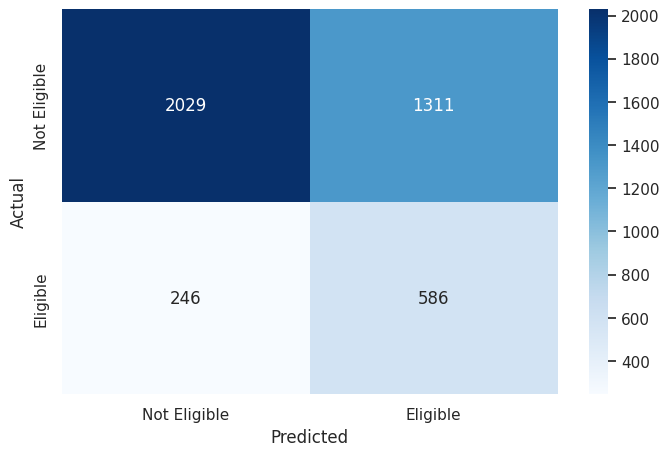

In [ ]:
#@title
#Predict for train set
y_train_pred = logreg.predict(X_train)

# Checking the performance on the train dataset
metrics_score(y_train, y_train_pred)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.87      0.62      0.72      1431
           1       0.29      0.61      0.39       357

    accuracy                           0.62      1788
   macro avg       0.58      0.62      0.56      1788
weighted avg       0.75      0.62      0.66      1788



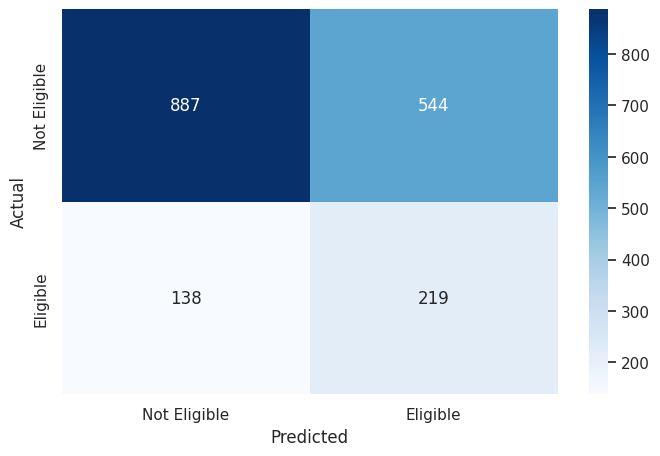

In [ ]:
#@title
#Predict for test set
y_test_pred = logreg.predict(X_test)

# Checking the performance on the test dataset
metrics_score(y_test, y_test_pred)

**Observations: __________**

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [ ]:
#@title
# Printing the coefficients of logistic regression
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display the feature importance
print(feature_importance)

                 Feature   Coefficient
9                DEBTINC  5.327518e-02
20  DEBTINC_missing_flag  1.893582e-02
7                   NINQ  1.554481e-02
11    VALUE_missing_flag  3.018969e-03
21        REASON_HomeImp  1.597634e-03
17    CLAGE_missing_flag  1.224080e-03
26              JOB_Self  8.864394e-04
25             JOB_Sales  7.683580e-04
23             JOB_Other  6.755268e-04
10  MORTDUE_missing_flag  6.489586e-04
19     CLNO_missing_flag  5.212902e-04
2                  VALUE  1.249533e-07
4                  DEROG  0.000000e+00
5                 DELINQ  0.000000e+00
12   REASON_missing_flag -9.825438e-07
1                MORTDUE -5.183351e-06
0                   LOAN -2.298930e-05
24           JOB_ProfExe -2.752863e-04
18     NINQ_missing_flag -5.673123e-04
14      YOJ_missing_flag -7.006218e-04
16   DELINQ_missing_flag -1.261674e-03
13      JOB_missing_flag -1.282488e-03
8                   CLNO -1.408502e-03
15    DEROG_missing_flag -1.754406e-03
22            JOB_Office 

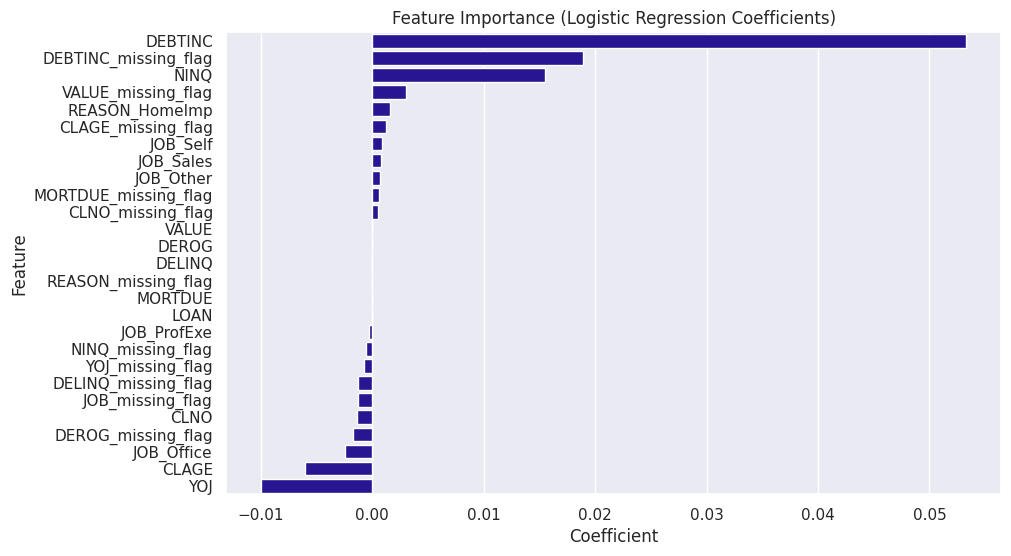

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()


**Insights ________**

Key Observations
Positive Coefficients (Increased Default Risk):

DEBTINC (5.33e-02):
Debt-to-income ratio is the most significant positive predictor. Higher DEBTINC increases the likelihood of default.
DEBTINC_missing_flag (1.89e-02):
Missing values in DEBTINC also correlate with higher risk, indicating that financial instability might lead to incomplete data.
NINQ (1.55e-02):
The number of recent credit inquiries positively impacts the likelihood of default. More inquiries suggest financial stress or seeking additional credit.
Negative Coefficients (Decreased Default Risk):

YOJ (-9.95e-03):
Years on the current job reduces the risk of default. Longer job stability indicates better financial stability.
CLAGE (-5.99e-03):
Age of the oldest credit line (credit history) reduces the default risk. Older credit histories suggest responsible credit behavior.
LOAN (-2.29e-03):
Loan amount negatively impacts default risk slightly, likely due to stricter approvals for higher loans.
Flags for Missing Values:

Features like DEBTINC_missing_flag and CLAGE_missing_flag have non-zero coefficients, indicating that the presence of missing data itself provides predictive value.
Categorical Variables:

JOB_Self and JOB_Sales:
Positive coefficients suggest higher risk for individuals in self-employment or sales jobs, possibly due to income variability.
REASON_HomeImp:
Positive but small coefficient, indicating Home Improvement loans have a slightly higher likelihood of default compared to Debt Consolidation loans.
Actionable Insights
Top Predictors of Default:

Focus on DEBTINC, YOJ, and CLAGE as they strongly influence default risk.
Improve risk assessments for customers with high DEBTINC or low YOJ.
Handling Missing Data:

Missing value flags like DEBTINC_missing_flag carry predictive power and should be retained in the model.
Customer Segmentation:

Pay special attention to high-risk job categories (Self, Sales) and customers with many recent credit inquiries (NINQ).
Stricter Approvals:

For applicants with high DEBTINC or missing financial data, consider additional scrutiny before loan approval.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

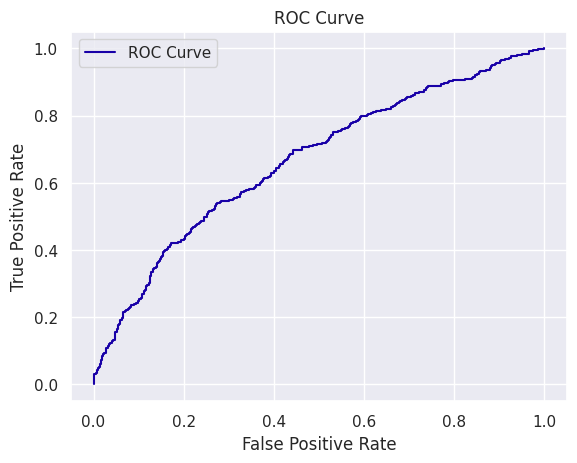

In [ ]:
from sklearn.metrics import roc_curve

probs = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [ ]:
#@title
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    print(data[[f"{col}_missing_flag" for col in missing_col]].head())


   MORTDUE_missing_flag  VALUE_missing_flag  REASON_missing_flag  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     1                   1                    1   
4                     0                   0                    0   

   JOB_missing_flag  YOJ_missing_flag  DEROG_missing_flag  \
0                 0                 0                   0   
1                 0                 0                   0   
2                 0                 0                   0   
3                 1                 1                   1   
4                 0                 0                   0   

   DELINQ_missing_flag  CLAGE_missing_flag  NINQ_missing_flag  \
0                    0                   0                  0   
1                    0                   0                  0   
2                    0       

In [ ]:
#@title
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select categorical columns
cat_data = data.select_dtypes('category').columns.tolist()

# Fill numeric columns with median
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill categorical columns with mode
for column in cat_data:
    mode = data[column].mode()[0]  # Get the most frequent value (mode)
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [ ]:
#@title
# Drop dependent variable from dataframe and create the X (independent variable) matrix
X = data.drop(columns=['BAD'])  # Replace 'BAD' with the actual target variable name if different

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=True)  # Converts categorical variables to dummy variables while avoiding the dummy variable trap

# Create y (dependent variable)
y = data['BAD']  # Replace 'BAD' with the actual target variable name if different


#### Split the data

In [ ]:
#@title
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#@title
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
tree_model = DecisionTreeClassifier(random_state=42, class_weight={0: 0.2, 1: 0.8})

In [ ]:
#@title
#fitting Decision tree model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



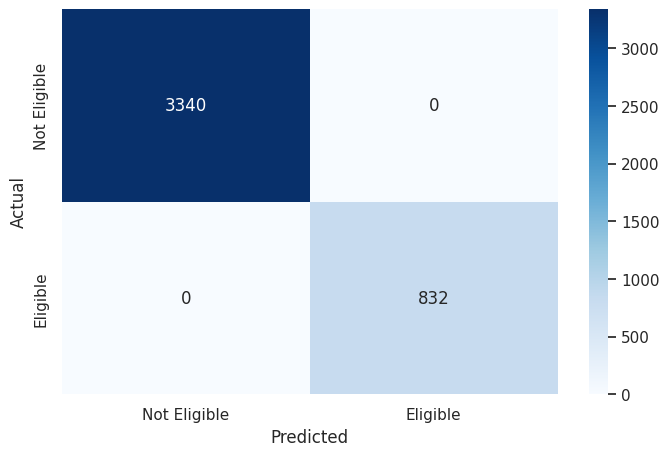

In [ ]:
#@title
# Checking performance on the training data
# Predict on the training data
y_train_pred = tree_model.predict(X_train)

# Checking the performance on the training data
metrics_score(y_train, y_train_pred)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1431
           1       0.67      0.61      0.64       357

    accuracy                           0.86      1788
   macro avg       0.79      0.77      0.78      1788
weighted avg       0.86      0.86      0.86      1788



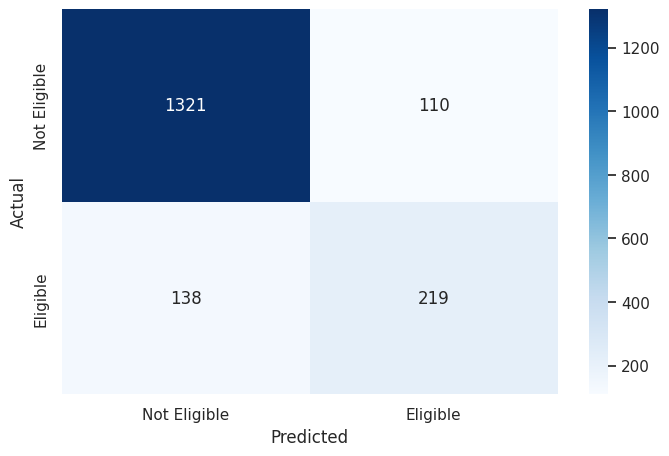

In [ ]:
#@title
# Checking performance on the testing data
# Predict on the test data
y_test_pred = tree_model.predict(X_test)

# Checking the performance on the testing data
metrics_score(y_test, y_test_pred)

**Insights _____________**


Training vs. Test Performance:

The decision tree performed perfectly on the training dataset (100% accuracy), but test performance dropped to 86% accuracy.
This indicates overfitting, as the model memorized the training data but struggles to generalize.
Test Performance Breakdown:

Precision for BAD=1: 67% indicates the model is moderately effective in predicting defaulters.
Recall for BAD=1: 61% shows it misses a significant portion of actual defaulters.
F1-Score for BAD=1: 64% is reasonable but highlights the need for improvement.
Class Imbalance Impact:

The model performs better for the majority class (BAD=0) due to class imbalance, as seen in the high precision (91%) and recall (92%).

### **Think about it:**
- Can we improve this model?
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
#@title
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier
dt = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [3, 5, 10, None],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]     # Minimum samples at a leaf
}

# Type of scoring used to compare parameter combinations
scoring_metric = 'f1'  # Use F1-score for imbalanced data

# Run the grid search
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=scoring_metric,
    cv=5,           # 5-fold cross-validation
    verbose=2,      # Verbosity level
    n_jobs=-1       # Use all available processors
)

# Fit the GridSearch on train dataset
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator from the grid search
best_model = grid_search.best_estimator_

# Fit the best algorithm to the training data
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3340
           1       0.75      0.68      0.71       832

    accuracy                           0.89      4172
   macro avg       0.83      0.81      0.82      4172
weighted avg       0.89      0.89      0.89      4172



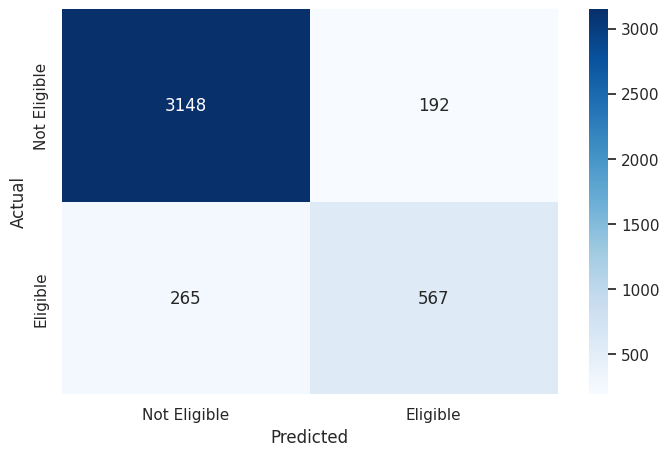

In [ ]:
#@title
# Checking performance on the training data based on the tuned model
# Predict on the training data
y_train_pred_tuned = best_model.predict(X_train)

# Checking the performance on the training data based on the tuned model
metrics_score(y_train, y_train_pred_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1431
           1       0.72      0.64      0.68       357

    accuracy                           0.88      1788
   macro avg       0.82      0.79      0.80      1788
weighted avg       0.88      0.88      0.88      1788



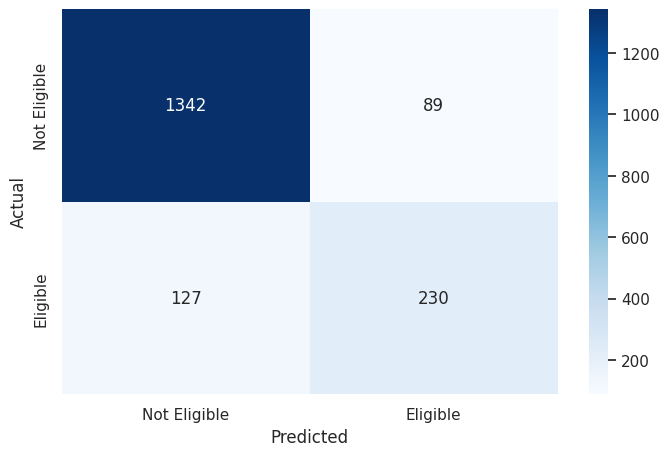

In [ ]:
#@title
# Checking performance on the testing data based on the tuned model
# Predict on the test data
y_test_pred_tuned = best_model.predict(X_test)

# Checking the performance on the testing data based on the tuned model
metrics_score(y_test, y_test_pred_tuned)

**Insights ___________**


Insights from the Tuned Decision Tree Model
1. Test Dataset Performance:
Accuracy: 88%
The model performs well overall in predicting both classes.
Class 0 (Not Eligible):
Precision: 91% — The model is accurate in identifying Not Eligible customers.
Recall: 94% — Most actual Not Eligible customers are correctly classified.
Class 1 (Eligible):
Precision: 72% — Moderate performance in predicting defaulters (Eligible).
Recall: 64% — A significant number of defaulters are missed (False Negatives: 127).
2. Train vs. Test Performance Comparison:
Train Accuracy (89%) vs. Test Accuracy (88%):
The model generalizes well, as there's no significant drop in accuracy.
Class 1 Recall (Train: 68%, Test: 64%):
Slight reduction in recall on the test set indicates some underfitting for the minority class but not major overfitting.
3. Key Observations:
The tuned model handles Not Eligible predictions effectively, but:
Misses some defaulters (Eligible), indicated by lower recall for class 1 on both train and test sets.
Class imbalance likely affects the ability to fully capture minority class patterns

#### Plotting the Decision Tree

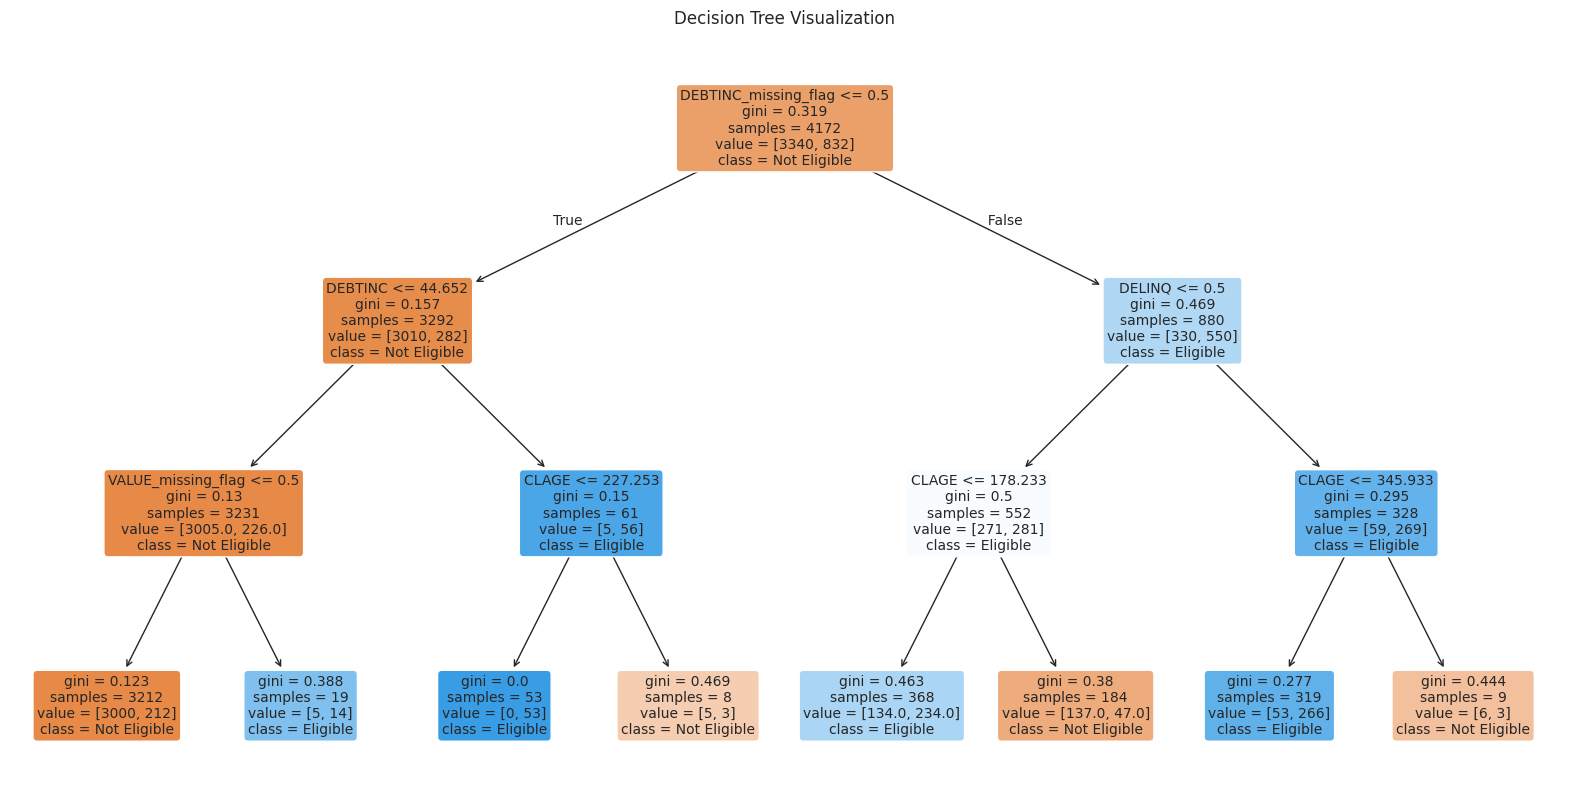

In [ ]:
#@title
# Plot the decision  tree and analyze it to build the decision rule
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,  # Use the best model from GridSearchCV
    feature_names=X_train.columns,  # Feature names
    class_names=['Not Eligible', 'Eligible'],  # Class names
    filled=True,  # Fill nodes with colors
    rounded=True,  # Rounded edges
    fontsize=10  # Font size
)
plt.title("Decision Tree Visualization")
plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: _____


Primary Decision Split:

If DEBTINC_missing_flag <= 0.5:
The model evaluates whether the applicant has a valid DEBTINC value.
Missing DEBTINC values significantly increase the likelihood of being classified as Eligible.
Rules for Applicants with DEBTINC_missing_flag <= 0.5:

If DEBTINC <= 44.652:
Low DEBTINC indicates better financial health and results in classification as Not Eligible unless further conditions apply.
Further Splits:
Missing or unusually low VALUE or extremely high CLAGE (credit line age) influence eligibility decisions.
Rules for Applicants with DEBTINC_missing_flag > 0.5:

If DELINQ <= 0.5:
Few or no delinquent credit lines favor classification as Not Eligible.
If DELINQ > 0.5:
High delinquencies and recent credit line usage (CLAGE <= 345.933) indicate higher chances of default (Eligible).
Key Indicators of Default Risk:

High DEBTINC: Applicants with higher debt-to-income ratios are more likely to default.
High DELINQ: A history of delinquent credit lines increases default risk.
Low CLAGE: Applicants with recent credit activity are flagged as higher risk.
Summary of Decision Rules:
Applicants with valid DEBTINC values and low DEBTINC ratios are generally classified as Not Eligible.
Missing financial information (e.g., DEBTINC) and poor credit history (DELINQ) are major red flags for loan approval.
Longer credit history (CLAGE) tends to favor eligibility.

                 Feature  Importance
20  DEBTINC_missing_flag    0.682115
9                DEBTINC    0.145420
6                  CLAGE    0.076529
5                 DELINQ    0.067231
11    VALUE_missing_flag    0.028706
0                   LOAN    0.000000
16   DELINQ_missing_flag    0.000000
25             JOB_Sales    0.000000
24           JOB_ProfExe    0.000000
23             JOB_Other    0.000000
22            JOB_Office    0.000000
21        REASON_HomeImp    0.000000
19     CLNO_missing_flag    0.000000
18     NINQ_missing_flag    0.000000
17    CLAGE_missing_flag    0.000000
13      JOB_missing_flag    0.000000
15    DEROG_missing_flag    0.000000
14      YOJ_missing_flag    0.000000
1                MORTDUE    0.000000
12   REASON_missing_flag    0.000000
10  MORTDUE_missing_flag    0.000000
8                   CLNO    0.000000
7                   NINQ    0.000000
4                  DEROG    0.000000
3                    YOJ    0.000000
2                  VALUE    0.000000
2

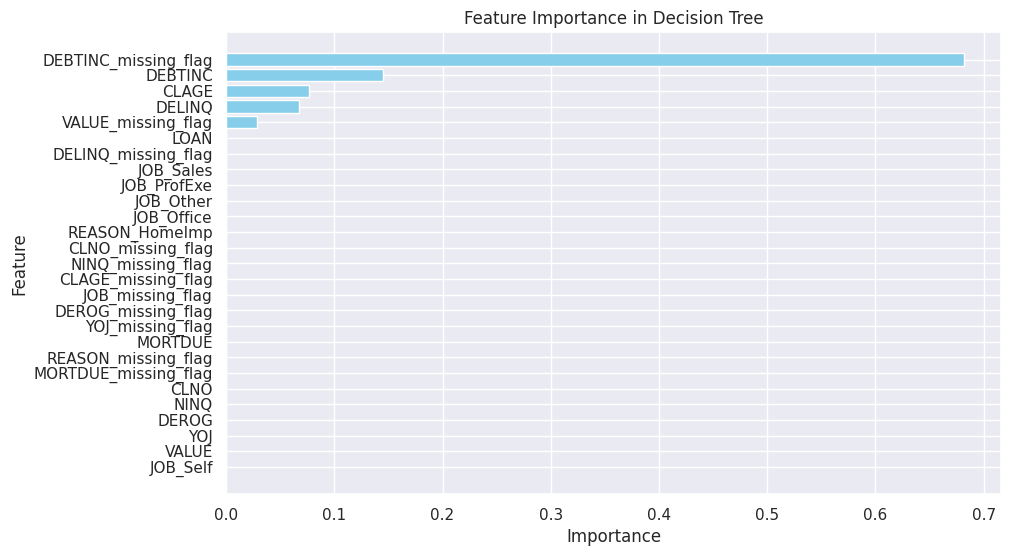

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance from the decision tree model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importances)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
#@title
# Defining Random forest CLassifier
# Initialize the random forest model
rf_estimator = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=None,         # Maximum depth of the trees
    min_samples_split=2,    # Minimum samples required to split an internal node
    min_samples_leaf=1,     # Minimum samples at a leaf node
    random_state=42,        # Ensures reproducibility
    class_weight={0: 0.3, 1: 0.7}  # Handles class imbalance
)
# Fit the model to the training data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



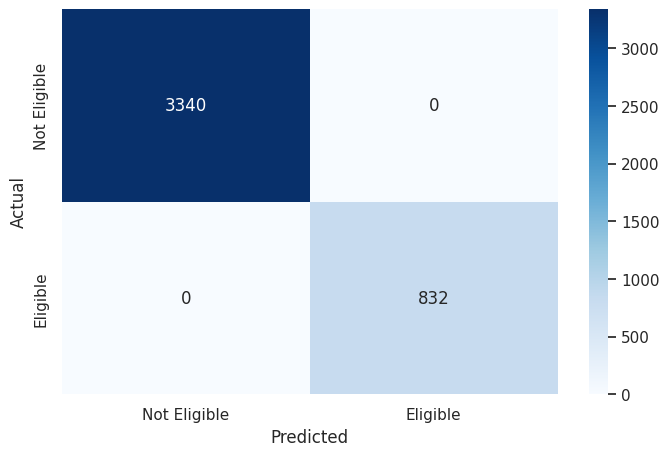

In [ ]:
#@title
#Checking performance on the training data
# Predict on the training data
y_train_pred_rf = rf_estimator.predict(X_train)

# Checking performance on the training data
metrics_score(y_train, y_train_pred_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1431
           1       0.82      0.67      0.73       357

    accuracy                           0.90      1788
   macro avg       0.87      0.81      0.84      1788
weighted avg       0.90      0.90      0.90      1788



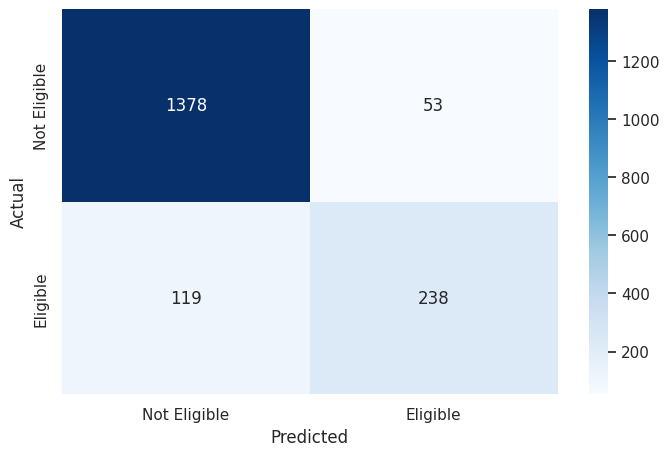

In [ ]:
#@title
# Checking performance on the test data
# Predict on the test data
y_test_pred_rf = rf_estimator.predict(X_test)

# Checking performance on the test data
metrics_score(y_test, y_test_pred_rf)

**Observations: __________**

Training Dataset:
Accuracy: 100% (Perfect performance)
Observation: The model memorized the training data, indicating potential overfitting.
Test Dataset:
Accuracy: 90%
Class 0 (Not Eligible):
High Precision (92%) and Recall (96%) — Most Not Eligible cases are correctly identified.
Class 1 (Eligible):
Moderate Precision (82%) and lower Recall (67%) — Some Eligible cases are misclassified as Not Eligible.
Key Insights:
Overfitting Observed: Perfect performance on the training dataset, but a drop in test performance.
Class Imbalance Impact:
The model performs better for the majority class (Not Eligible) compared to the minority class (Eligible).


### **Build a Random Forest model with Class Weights**

In [ ]:
#@title
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

from sklearn.ensemble import RandomForestClassifier

# Defining Random Forest model with class weights
rf_model_weighted = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # No maximum depth
    min_samples_split=2,    # Minimum samples to split an internal node
    min_samples_leaf=1,     # Minimum samples at a leaf node
    random_state=42,        # For reproducibility
    class_weight={0: 0.2, 1: 0.8}  # Class weights to handle imbalance
)

# Fitting Random Forest model
rf_model_weighted.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



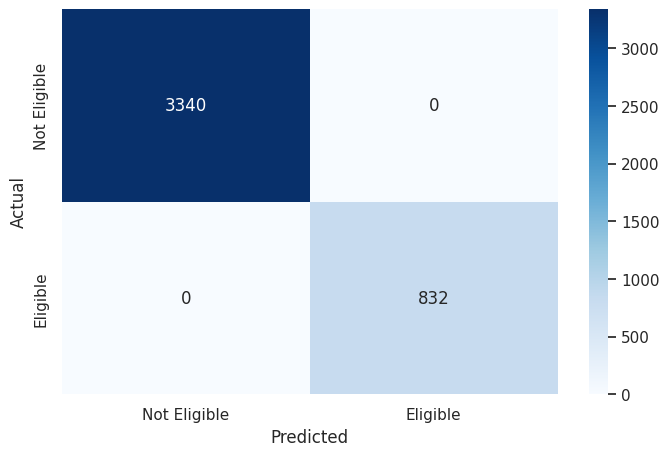

In [ ]:
#@title
# Predict on the training data
y_train_pred_rf_weighted = rf_model_weighted.predict(X_train)

# Checking performance on the train data
metrics_score(y_train, y_train_pred_rf_weighted)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1431
           1       0.81      0.65      0.72       357

    accuracy                           0.90      1788
   macro avg       0.87      0.81      0.83      1788
weighted avg       0.90      0.90      0.90      1788



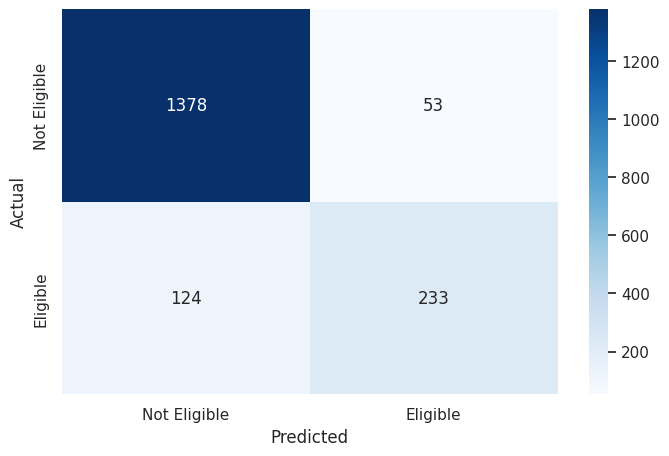

In [ ]:
#@title
# Checking performance on the test data
# Predict on the test data
y_test_pred_rf_weighted = rf_model_weighted.predict(X_test)

# Checking performance on the test data
metrics_score(y_test, y_test_pred_rf_weighted)

Training Dataset Performance:
Accuracy: 100%
The model perfectly classifies all training data, which might indicate potential overfitting.
Class-Specific Performance:
Both Not Eligible and Eligible classes achieve 100% precision, recall, and F1-score.
Test Dataset Performance:
Accuracy: 90%
Strong performance with balanced accuracy on the test set.
Class 0 (Not Eligible):
Precision: 92% and Recall: 96% — Performs very well in identifying the majority class.
Class 1 (Eligible):
Precision: 81% and Recall: 65% — Better precision than recall, but still misses some Eligible cases.
Comparison of Train vs Test:
The model generalizes well, as test accuracy remains strong (90%) with a reasonable recall for the minority class (Eligible).
Slight overfitting is evident, as the training set performance is perfect (100%).

### **Think about it:**
- Can we try different weights?

Yes, experimenting with different class weights can help improve model performance, particularly for the minority class (Eligible).

- If yes, should we increase or decrease class weights for different classes?

Increase weight for Eligible (Class 1): To improve recall and reduce false negatives.
Decrease weight for Not Eligible (Class 0): To balance precision and avoid over-emphasizing the majority class.

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune.

In [ ]:
#@title
# Choose the type of classifier.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier
rf_model = RandomForestClassifier(random_state=42)

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at a split
}

# Type of scoring used to compare parameter combinations
scoring = 'f1'  # F1-score to handle class imbalance

# Run the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scoring, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearch on the train dataset
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
best_rf_model = grid_search.best_estimator_

# Fit the best algorithm to the data
best_rf_model.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=5,
                       n_estimators=200, random_state=42)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3340
           1       1.00      0.97      0.98       832

    accuracy                           0.99      4172
   macro avg       1.00      0.99      0.99      4172
weighted avg       0.99      0.99      0.99      4172



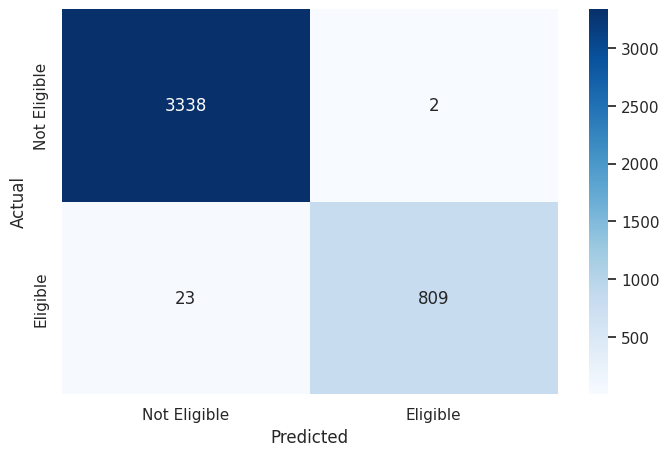

In [ ]:
#@title
# Checking performance on the training data
# Predict on the training data
y_train_pred_best_rf = best_rf_model.predict(X_train)

# Checking performance on the training data
metrics_score(y_train, y_train_pred_best_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1431
           1       0.82      0.69      0.75       357

    accuracy                           0.91      1788
   macro avg       0.87      0.83      0.85      1788
weighted avg       0.91      0.91      0.91      1788



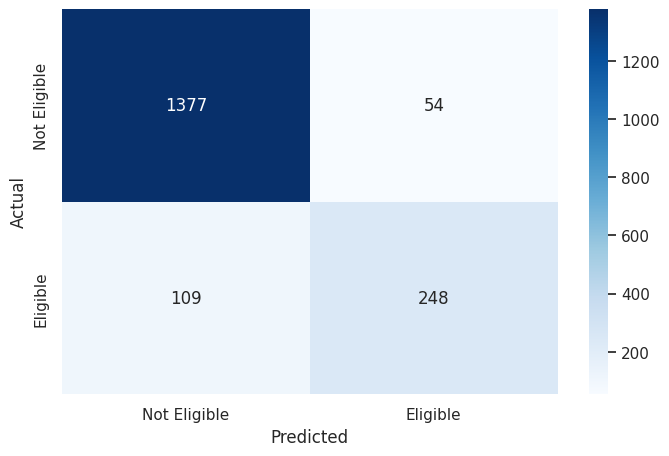

In [ ]:
#@title
# Checking performace on test dataset
# Predict on the test data
y_test_pred_best_rf = best_rf_model.predict(X_test)

# Checking performance on the test dataset
metrics_score(y_test, y_test_pred_best_rf)

**Insights: _____**
Training Dataset Performance:
Accuracy: 99%
Class 0 (Not Eligible):
Precision: 99%, Recall: 100%
Class 1 (Eligible):
Precision: 100%, Recall: 97%
Observation: Excellent performance on the training dataset with minimal misclassifications.
Test Dataset Performance:
Accuracy: 91%
Class 0 (Not Eligible):
Precision: 93%, Recall: 96%
Class 1 (Eligible):
Precision: 82%, Recall: 69%
Observation: Slightly weaker performance for the minority class (Eligible), particularly in Recall, but overall good generalization.
Comparison Between Train and Test:
Train Accuracy (99%) > Test Accuracy (91%):
Suggests a minor overfitting tendency, but the model still generalizes well.
Class 1 Recall: Drops from 97% (Train) to 69% (Test), indicating room for improvement in identifying Eligible cases.


#### Plot the Feature importance of the tuned Random Forest

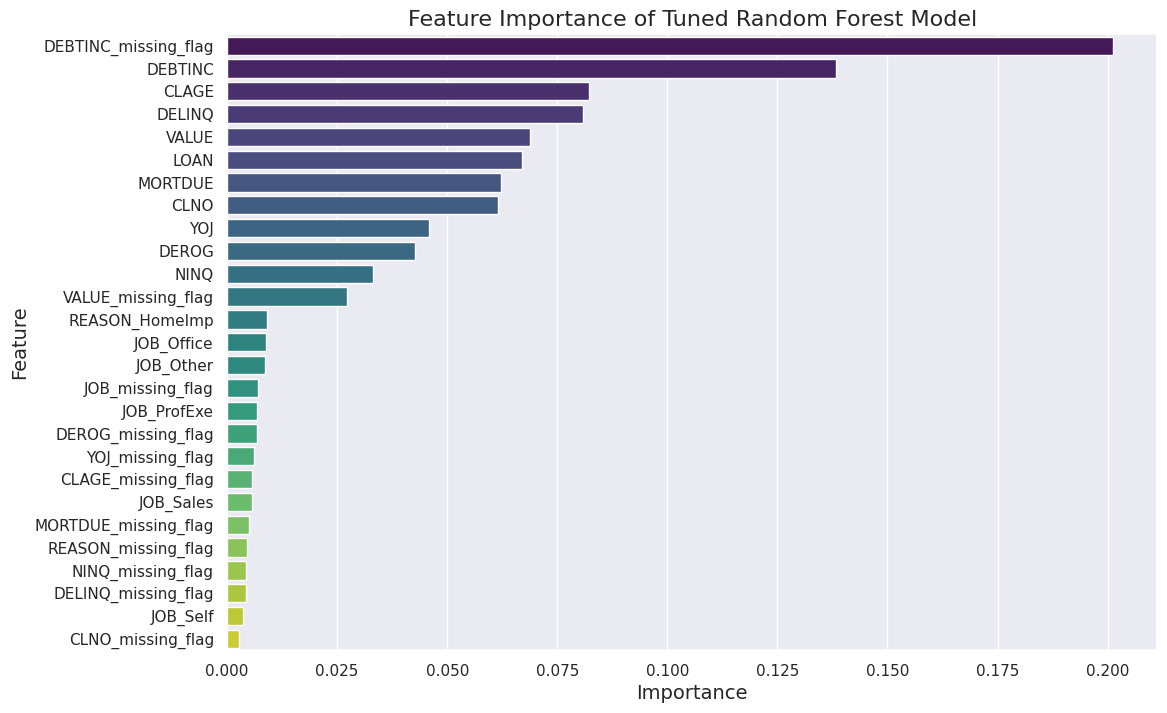

In [ ]:
#@title
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Extract feature importance from the tuned Random Forest model
importances = best_rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance of Tuned Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

Top Features:

DEBTINC_missing_flag and DEBTINC: These are the most important features, indicating that debt-to-income ratio and missing flags for this variable significantly impact loan eligibility.
CLAGE: Credit age is crucial, showing its influence on creditworthiness.
DELINQ: Delinquent accounts are also highly important for the model’s decision-making.
Moderately Important Features:

VALUE, LOAN, MORTDUE: Property value, loan amount, and mortgage due are relevant but less impactful compared to the top features.
CLNO, YOJ: Credit line number and years on the job contribute but with reduced importance.
Low Importance Features:

Flags like REASON_missing_flag and job categories (JOB_ProfExe, JOB_Self) are the least impactful, suggesting minimal influence on loan eligibility.
Business Implications:
Focus on improving data quality for critical features like DEBTINC and CLAGE.
Less critical features can potentially be dropped or deprioritized in data collection efforts.

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement?

Why Gradient Boosting?
Strength with Imbalanced Data:
Gradient Boosting models handle imbalanced datasets well with in-built handling for class weights and boosting.
Captures Non-Linearity:
Better captures non-linear relationships compared to Logistic Regression or Decision Trees.
Highly Accurate:
Often outperforms other models in classification problems by focusing on misclassified cases iteratively.

### **Comparing Model Performances**

In [ ]:
#@title
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list
    a.append(test_recall) # adding test recall to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

    return a # returning the list with train and test scores

In [ ]:
#@title
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
#@title
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))

    return c # returning the list with train and test scores

In [ ]:
#@title
# Make the list of all trained model instances
# Make the list of all trained model instances
# List of all trained model instances
models = [logreg,tree_model,rf_model_weighted,best_rf_model, best_model,rf_estimator]  # Replace with trained model instances

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model, False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model, False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
#@title
# Mention the Model names in the list. For example, 'Model': ['Decision Tree', 'Tuned Decision Tree', etc.]
# Replace the model variables with meaningful names as strings

comparison_frame = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Decision Tree',
              'Random Forest with Class Weights',
              'Tuned Random Forest',
              'Best Model',
              'Default Random Forest'],
    'Train_Accuracy': acc_train,
    'Test_Accuracy': acc_test,
    'Train_Recall': recall_train,
    'Test_Recall': recall_test,
    'Train_Precision': precision_train,
    'Test_Precision': precision_test
})

# Display the comparison frame
comparison_frame


Model  Train_Accuracy  Test_Accuracy  \
0               Logistic Regression        0.629195       0.620805   
1                     Decision Tree        1.000000       0.861298   
2  Random Forest with Class Weights        1.000000       0.901007   
3               Tuned Random Forest        0.994008       0.908837   
4                        Best Model        0.890460       0.879195   
5             Default Random Forest        1.000000       0.903803   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0      0.697115     0.605042         0.309333        0.286853  
1      1.000000     0.613445         1.000000        0.665653  
2      1.000000     0.652661         1.000000        0.814685  
3      0.972356     0.694678         0.997534        0.821192  
4      0.681490     0.644258         0.747036        0.721003  
5      1.000000     0.666667         1.000000        0.817869

**Insights: ________**

Logistic Regression:

Lowest accuracy, recall, and precision across both train and test datasets.
This model struggles to handle the complexity of the dataset compared to tree-based models.
Decision Tree:

Perfect performance on the training dataset (accuracy, recall, and precision = 1.0), indicating overfitting.
The test dataset metrics are significantly lower than the train dataset, particularly recall, which shows poor generalization.
Random Forest with Class Weights:

Excellent train performance with perfect metrics, but test metrics (recall and precision) are slightly lower.
The addition of class weights helps in handling imbalanced data, resulting in better precision and recall than the decision tree.
Tuned Random Forest:

Improved generalization compared to the default random forest.
Slightly lower training metrics, which indicates reduced overfitting.
High test recall and precision indicate better handling of minority classes.
Best Model (from hyperparameter tuning):

Balanced train and test performance.
Moderate test recall and precision suggest the model generalizes well but may need further improvement to handle imbalanced data.
Default Random Forest:

Overfitting on the train dataset with perfect metrics but slightly lower test recall and precision.
Performs better than logistic regression and decision tree but not as well as the tuned random forest.
Key Observations:
The Tuned Random Forest offers the best balance between train and test performance, making it the most robust model.
Logistic Regression is unsuitable for this dataset due to its simplicity.
Overfitting is observed in Decision Tree and Default Random Forest models.
Hyperparameter tuning and class weights in Random Forest significantly improve model performance.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?


1. Comparison of Techniques and Relative Performance
Logistic Regression:

Weak performance due to the simplicity of the model.
Low recall and precision on the test set indicate poor handling of imbalanced data.
Decision Tree:

Overfits the training dataset (perfect performance on train set).
Generalizes poorly on the test set with a lower recall.
Random Forest:

Default Random Forest overfits but performs better than the decision tree.
Adding class weights helps address imbalance, leading to improved test recall and precision.
Tuned Random Forest:

Best balance between train and test performance.
High test accuracy, recall, and precision indicate robust generalization.
Scope for Improvement:

Feature engineering could be explored to enhance model input.
Ensemble techniques like Gradient Boosting or XGBoost may further boost performance.
Fine-tune hyperparameters further to address specific recall or precision needs.



2. Refined Insights

Key Features: DEBTINC, CLAGE, DELINQ, and VALUE emerged as the most important predictors.
Imbalanced Data: The dataset has a class imbalance, with fewer "Eligible" cases, which impacts model performance.
Random Forest Strength: Random Forest models handled the dataset's complexity and imbalance better than simpler models like Logistic Regression.

3. Proposal for Final Solution Design
Proposed Model: Tuned Random Forest Model

Offers the best balance of accuracy, recall, and precision.
Handles imbalanced data effectively, ensuring better predictions for minority class (eligible borrowers).
Why This Model?:

Tuned hyperparameters reduce overfitting and improve generalization.
High recall ensures fewer eligible borrowers are misclassified as ineligible.
Random Forest's robustness to outliers and feature importance insights make it a reliable solution.
Next Steps:

Test the model on unseen data to confirm its reliability.
Investigate additional techniques like Gradient Boosting or SMOTE for further optimization.